# Regularized Linear Regression

In [138]:
# General Libraries
import warnings

# Data Analysis & Visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from pickle import dump

warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [32]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [33]:
df = df.drop_duplicates().reset_index(drop = True)

In [34]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [35]:
null_records = []
for i in df.columns:
    null_records.append(sum(df[i].isna()))

In [36]:
for i in df.columns.tolist():
    print(i)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

In [37]:
#df.drop(columns=['0-9 y/o % of total pop','10-19 y/o % of total pop','20-29 y/o % of total pop','30-39 y/o % of total pop','40-49 y/o % of total pop','50-59 y/o % of total pop','60-69 y/o % of total pop','70-79 y/o % of total pop','80+ y/o % of total pop','% White-alone','% Black-alone'], inplace=True)

In [38]:
#df.drop(columns=['% NA/AI-alone','% Asian-alone','% Hawaiian/PI-aloe','% Two or more races'], inplace=True)

In [39]:
for i in df.columns.tolist():
    print(i)

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

### Check Correlation

In [65]:
dts = df.dtypes
n_cols = [c for c in list(dts[dts != "object"].index) if c != "Heart disease_number"]

In [67]:
b1 = ['Heart disease_number','TOT_POP','0-9','0-9 y/o % of total pop','19-Oct','10-19 y/o % of total pop','20-29','20-29 y/o % of total pop','30-39','30-39 y/o % of total pop','40-49','40-49 y/o % of total pop','50-59','50-59 y/o % of total pop','60-69','60-69 y/o % of total pop','70-79','70-79 y/o % of total pop','80+', '80+ y/o % of total pop']
b2 = ['Heart disease_number','White-alone pop','% White-alone','Black-alone pop','% Black-alone','Native American/American Indian-alone pop','% NA/AI-alone','Asian-alone pop','% Asian-alone','Hawaiian/Pacific Islander-alone pop','% Hawaiian/PI-alone','Two or more races pop','% Two or more races']
b3 = ['Heart disease_number','POP_ESTIMATE_2018','N_POP_CHG_2018','GQ_ESTIMATES_2018','R_birth_2018','R_death_2018','R_NATURAL_INC_2018','R_INTERNATIONAL_MIG_2018','R_DOMESTIC_MIG_2018','R_NET_MIG_2018']
b4 = ['Heart disease_number','Less than a high school diploma 2014-18','High school diploma only 2014-18',"Some college or associate's degree 2014-18","Bachelor's degree or higher 2014-18",'Percent of adults with less than a high school diploma 2014-18','Percent of adults with a high school diploma only 2014-18',"Percent of adults completing some college or associate's degree 2014-18","Percent of adults with a bachelor's degree or higher 2014-18"]
b5 = ['Heart disease_number','POVALL_2018','PCTPOVALL_2018','PCTPOV017_2018','PCTPOV517_2018','MEDHHINC_2018','CI90LBINC_2018','CI90UBINC_2018']
b6 = ['Heart disease_number','Civilian_labor_force_2018','Employed_2018','Unemployed_2018','Unemployment_rate_2018','Median_Household_Income_2018','Med_HH_Income_Percent_of_State_Total_2018']
b7 = ['Heart disease_number','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)','Active Primary Care Physicians per 100000 Population 2018 (AAMC)','Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','Total Specialist Physicians (2019)','ICU Beds_x']
b8 = ['Heart disease_number','fips','Total Population','Population Aged 60+','Percent of Population Aged 60+','STATE_FIPS','CNTY_FIPS','county_pop2018_18 and older']
b9 = ['Heart disease_number','anycondition_prevalence','anycondition_Lower 95% CI','anycondition_Upper 95% CI','anycondition_number','Obesity_prevalence','Obesity_Lower 95% CI','Obesity_Upper 95% CI','Obesity_number','Heart disease_prevalence','Heart disease_Lower 95% CI','Heart disease_Upper 95% CI','COPD_prevalence','COPD_Lower 95% CI','COPD_Upper 95% CI','COPD_number','diabetes_prevalence','diabetes_Lower 95% CI','diabetes_Upper 95% CI','diabetes_number','CKD_prevalence','CKD_Lower 95% CI','CKD_Upper 95% CI','CKD_number']

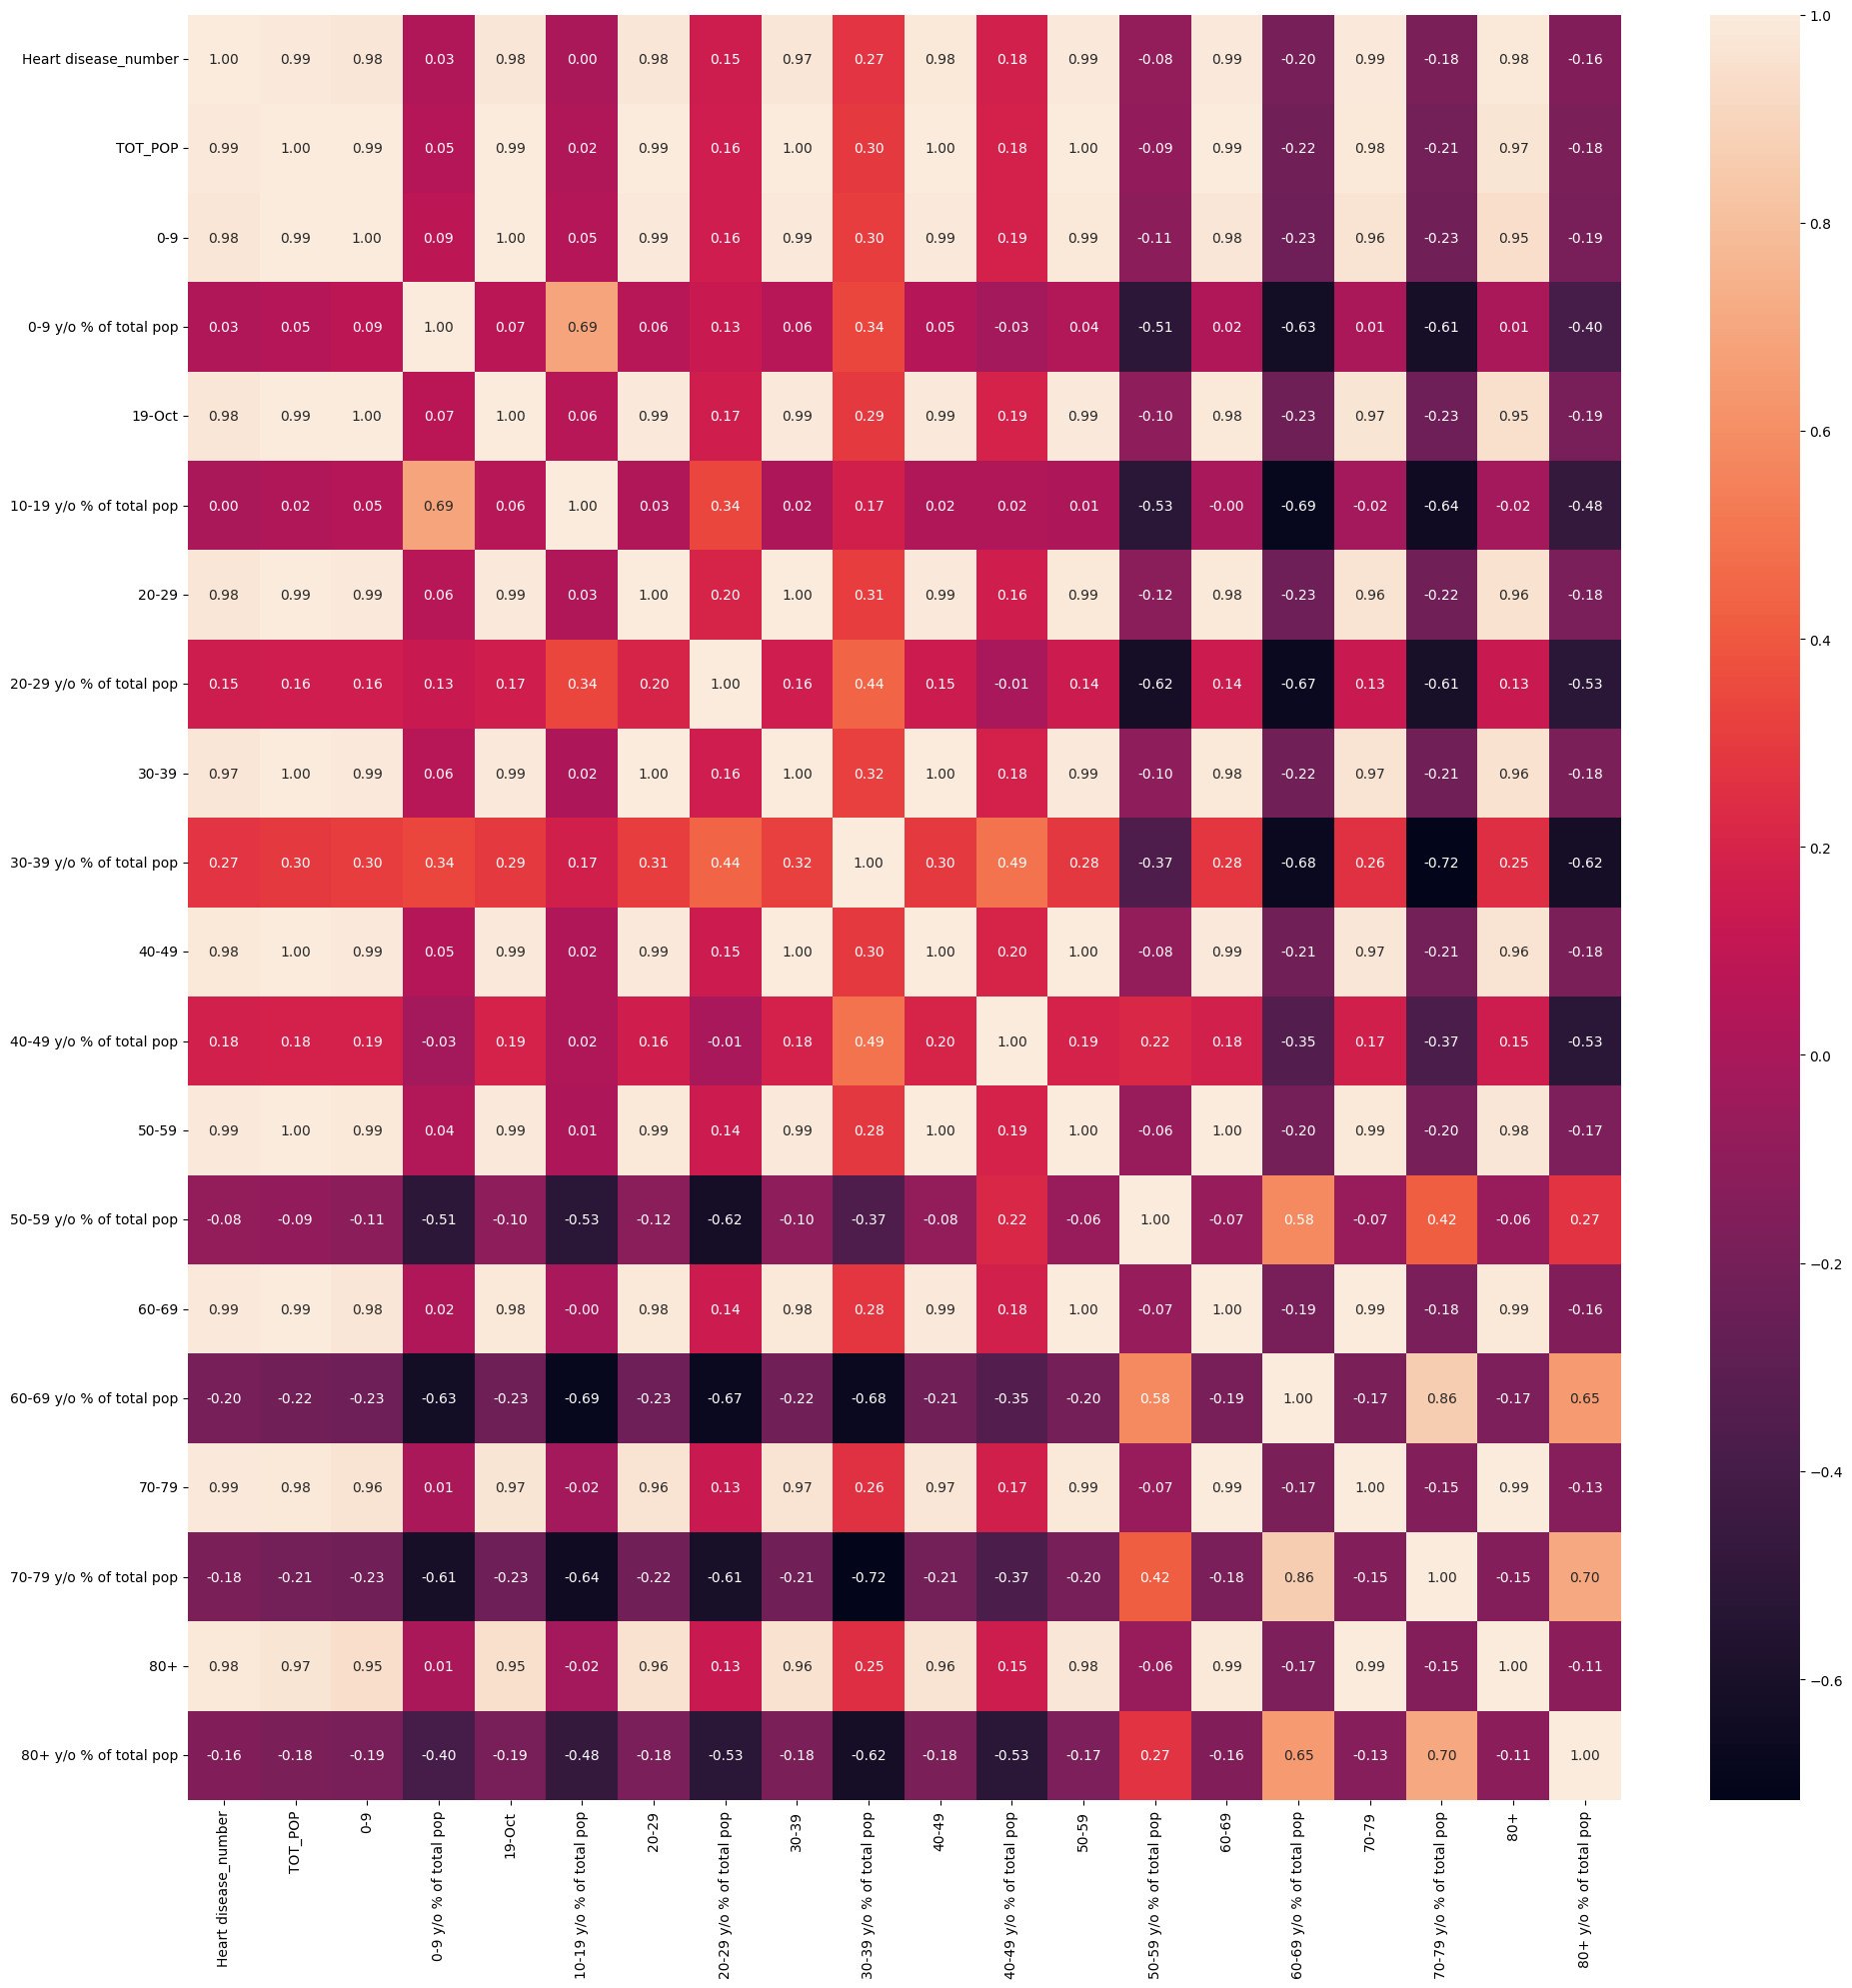

In [68]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b1 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

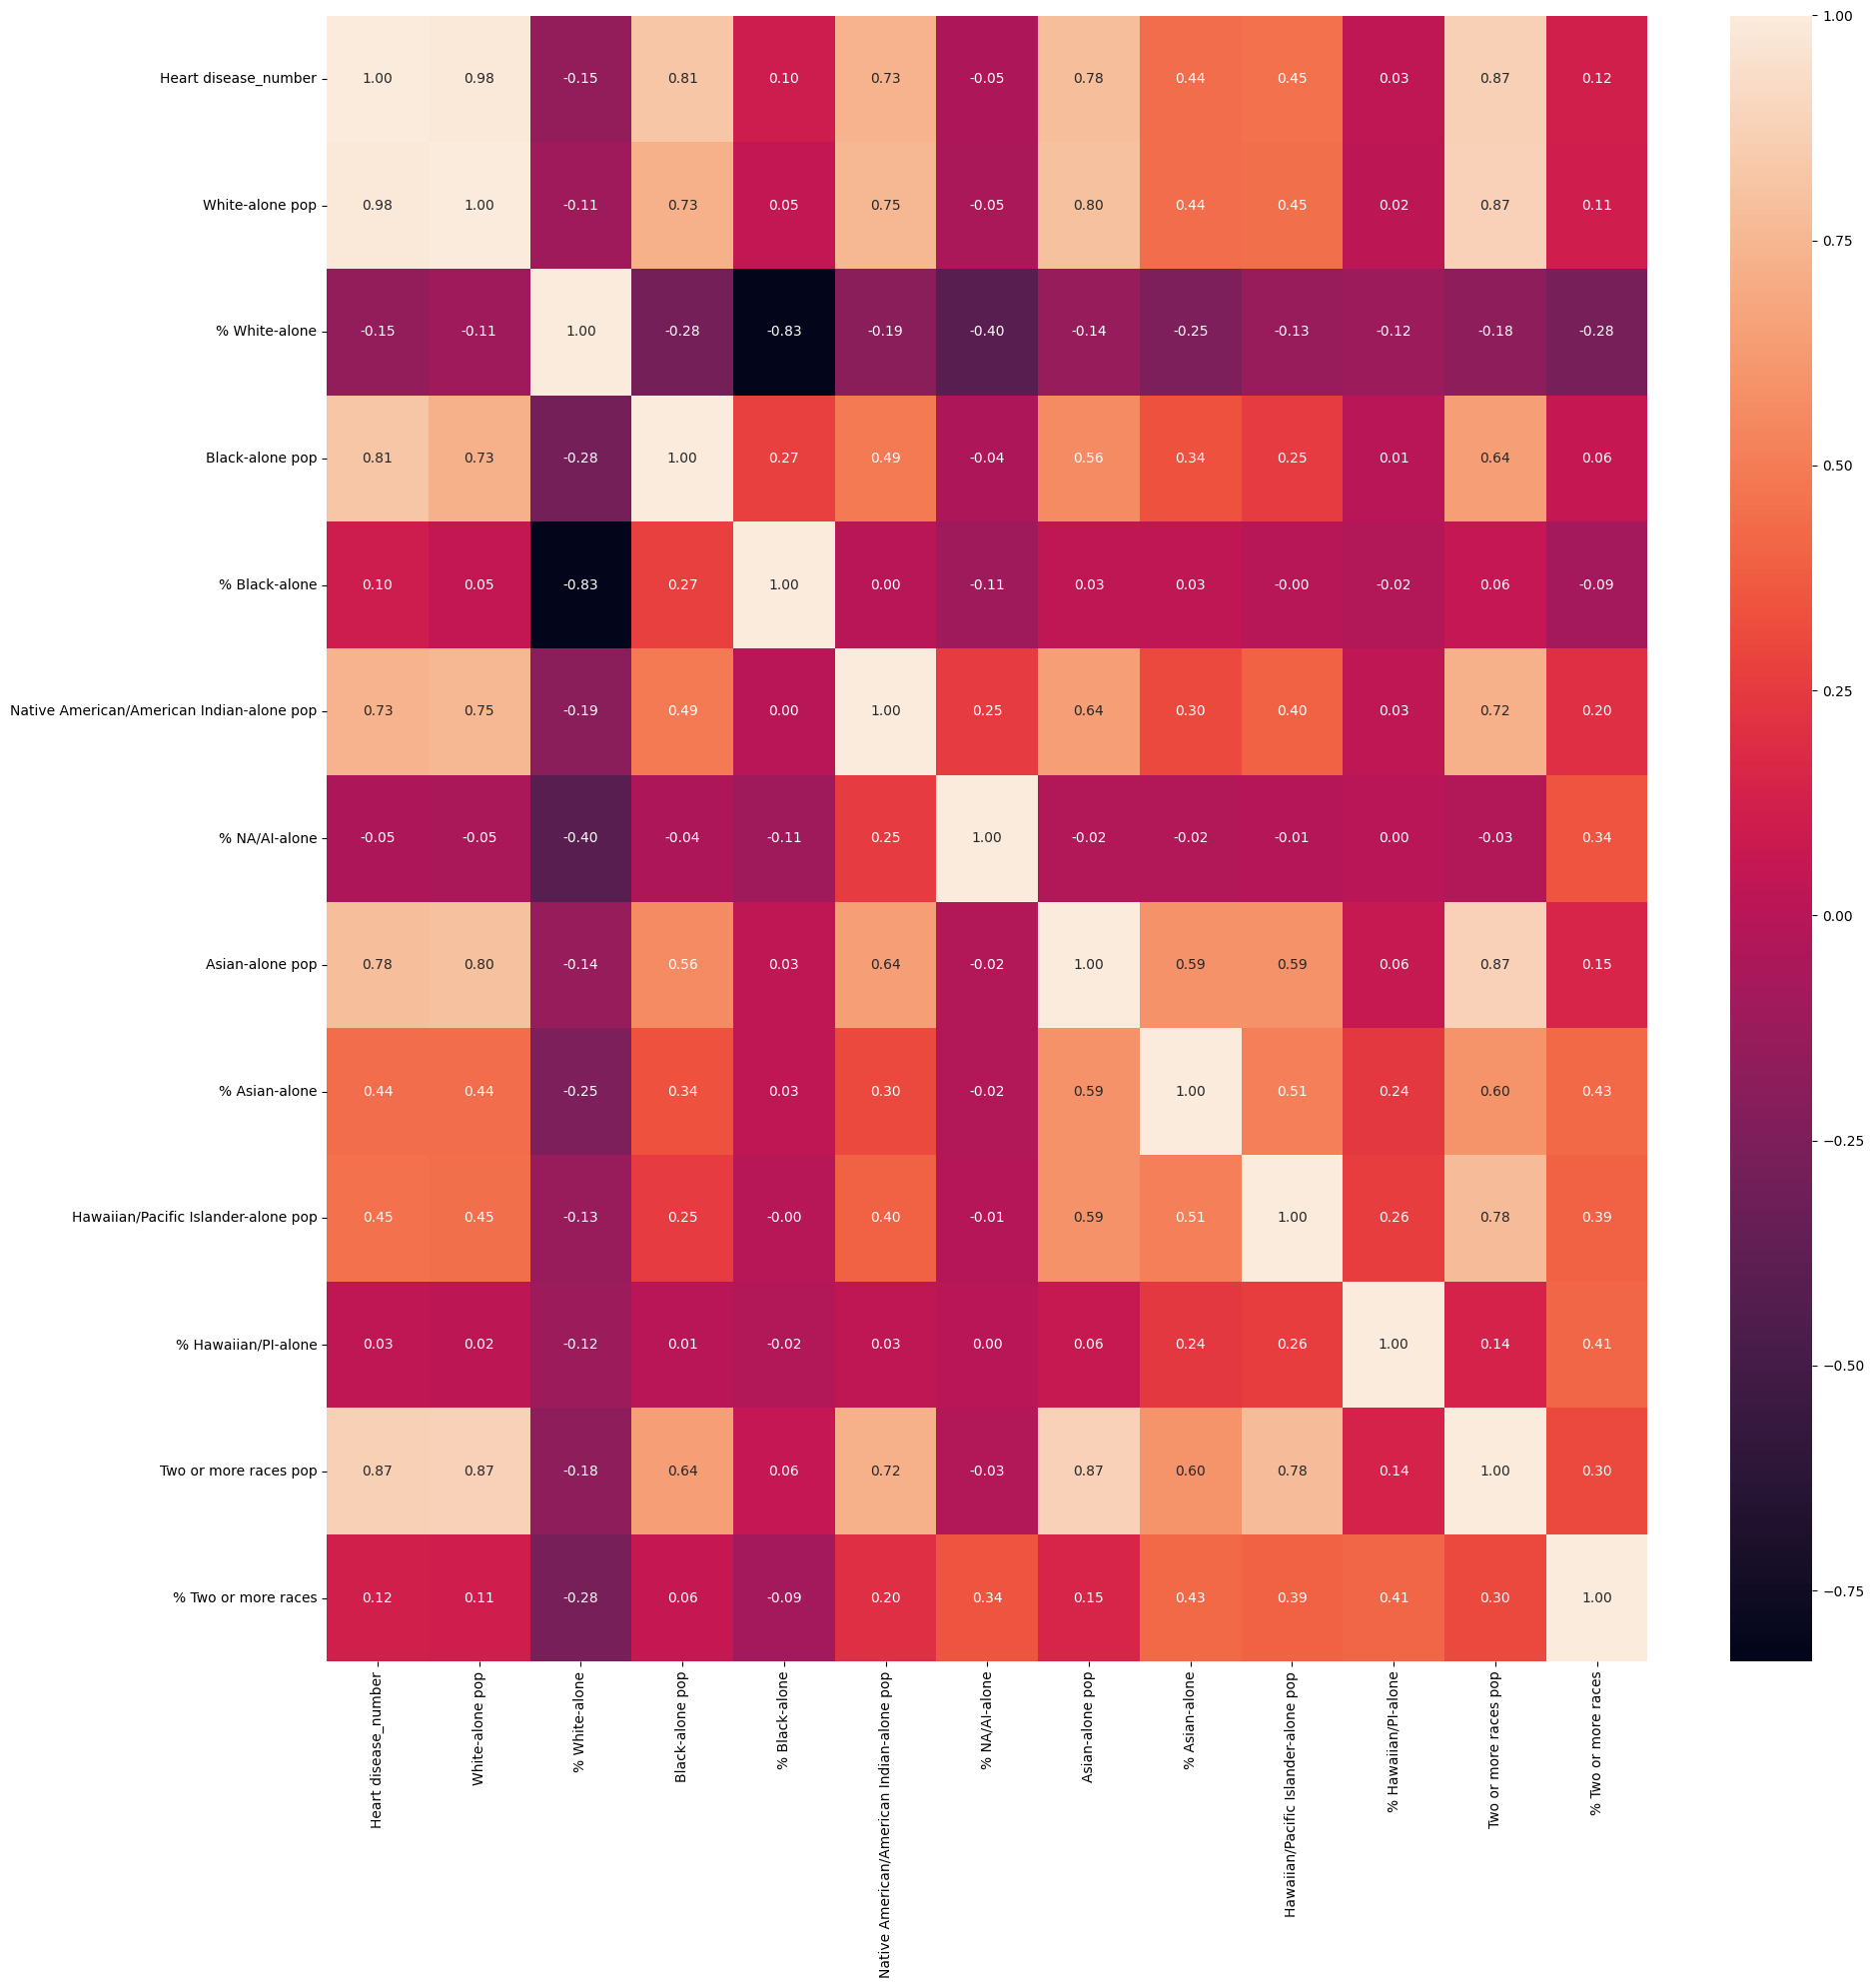

In [69]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b2 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

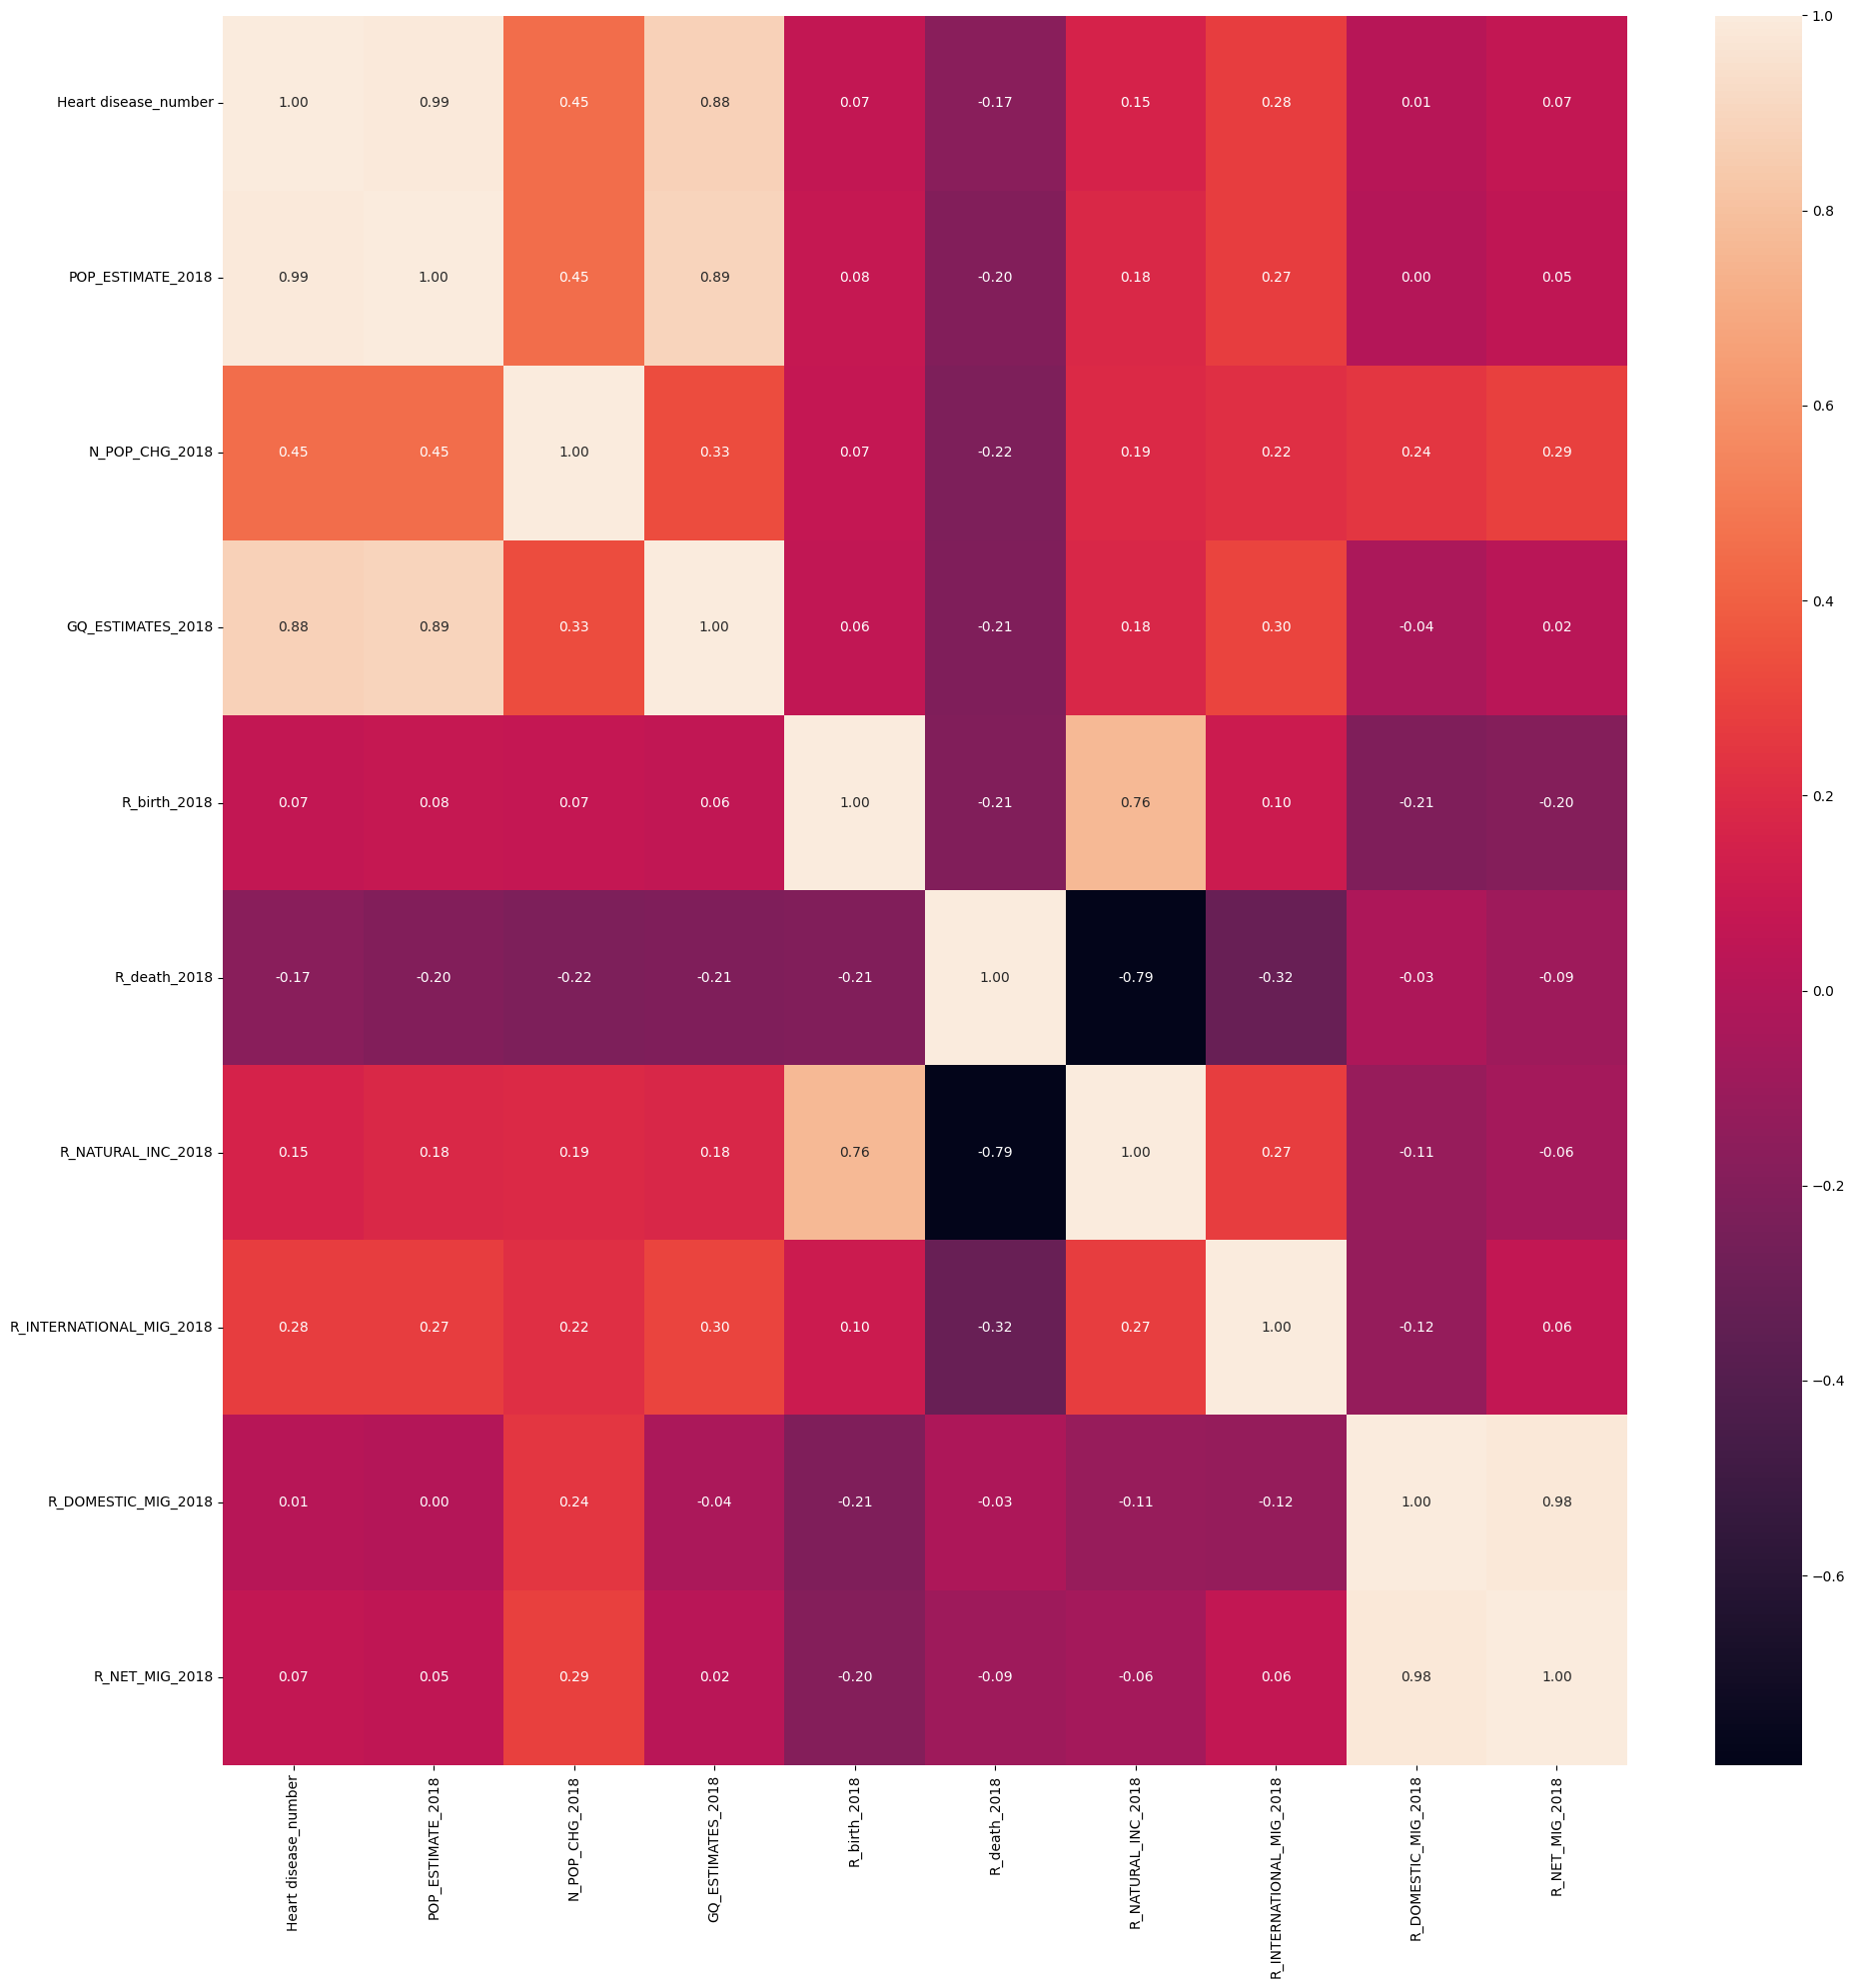

In [70]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b3 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

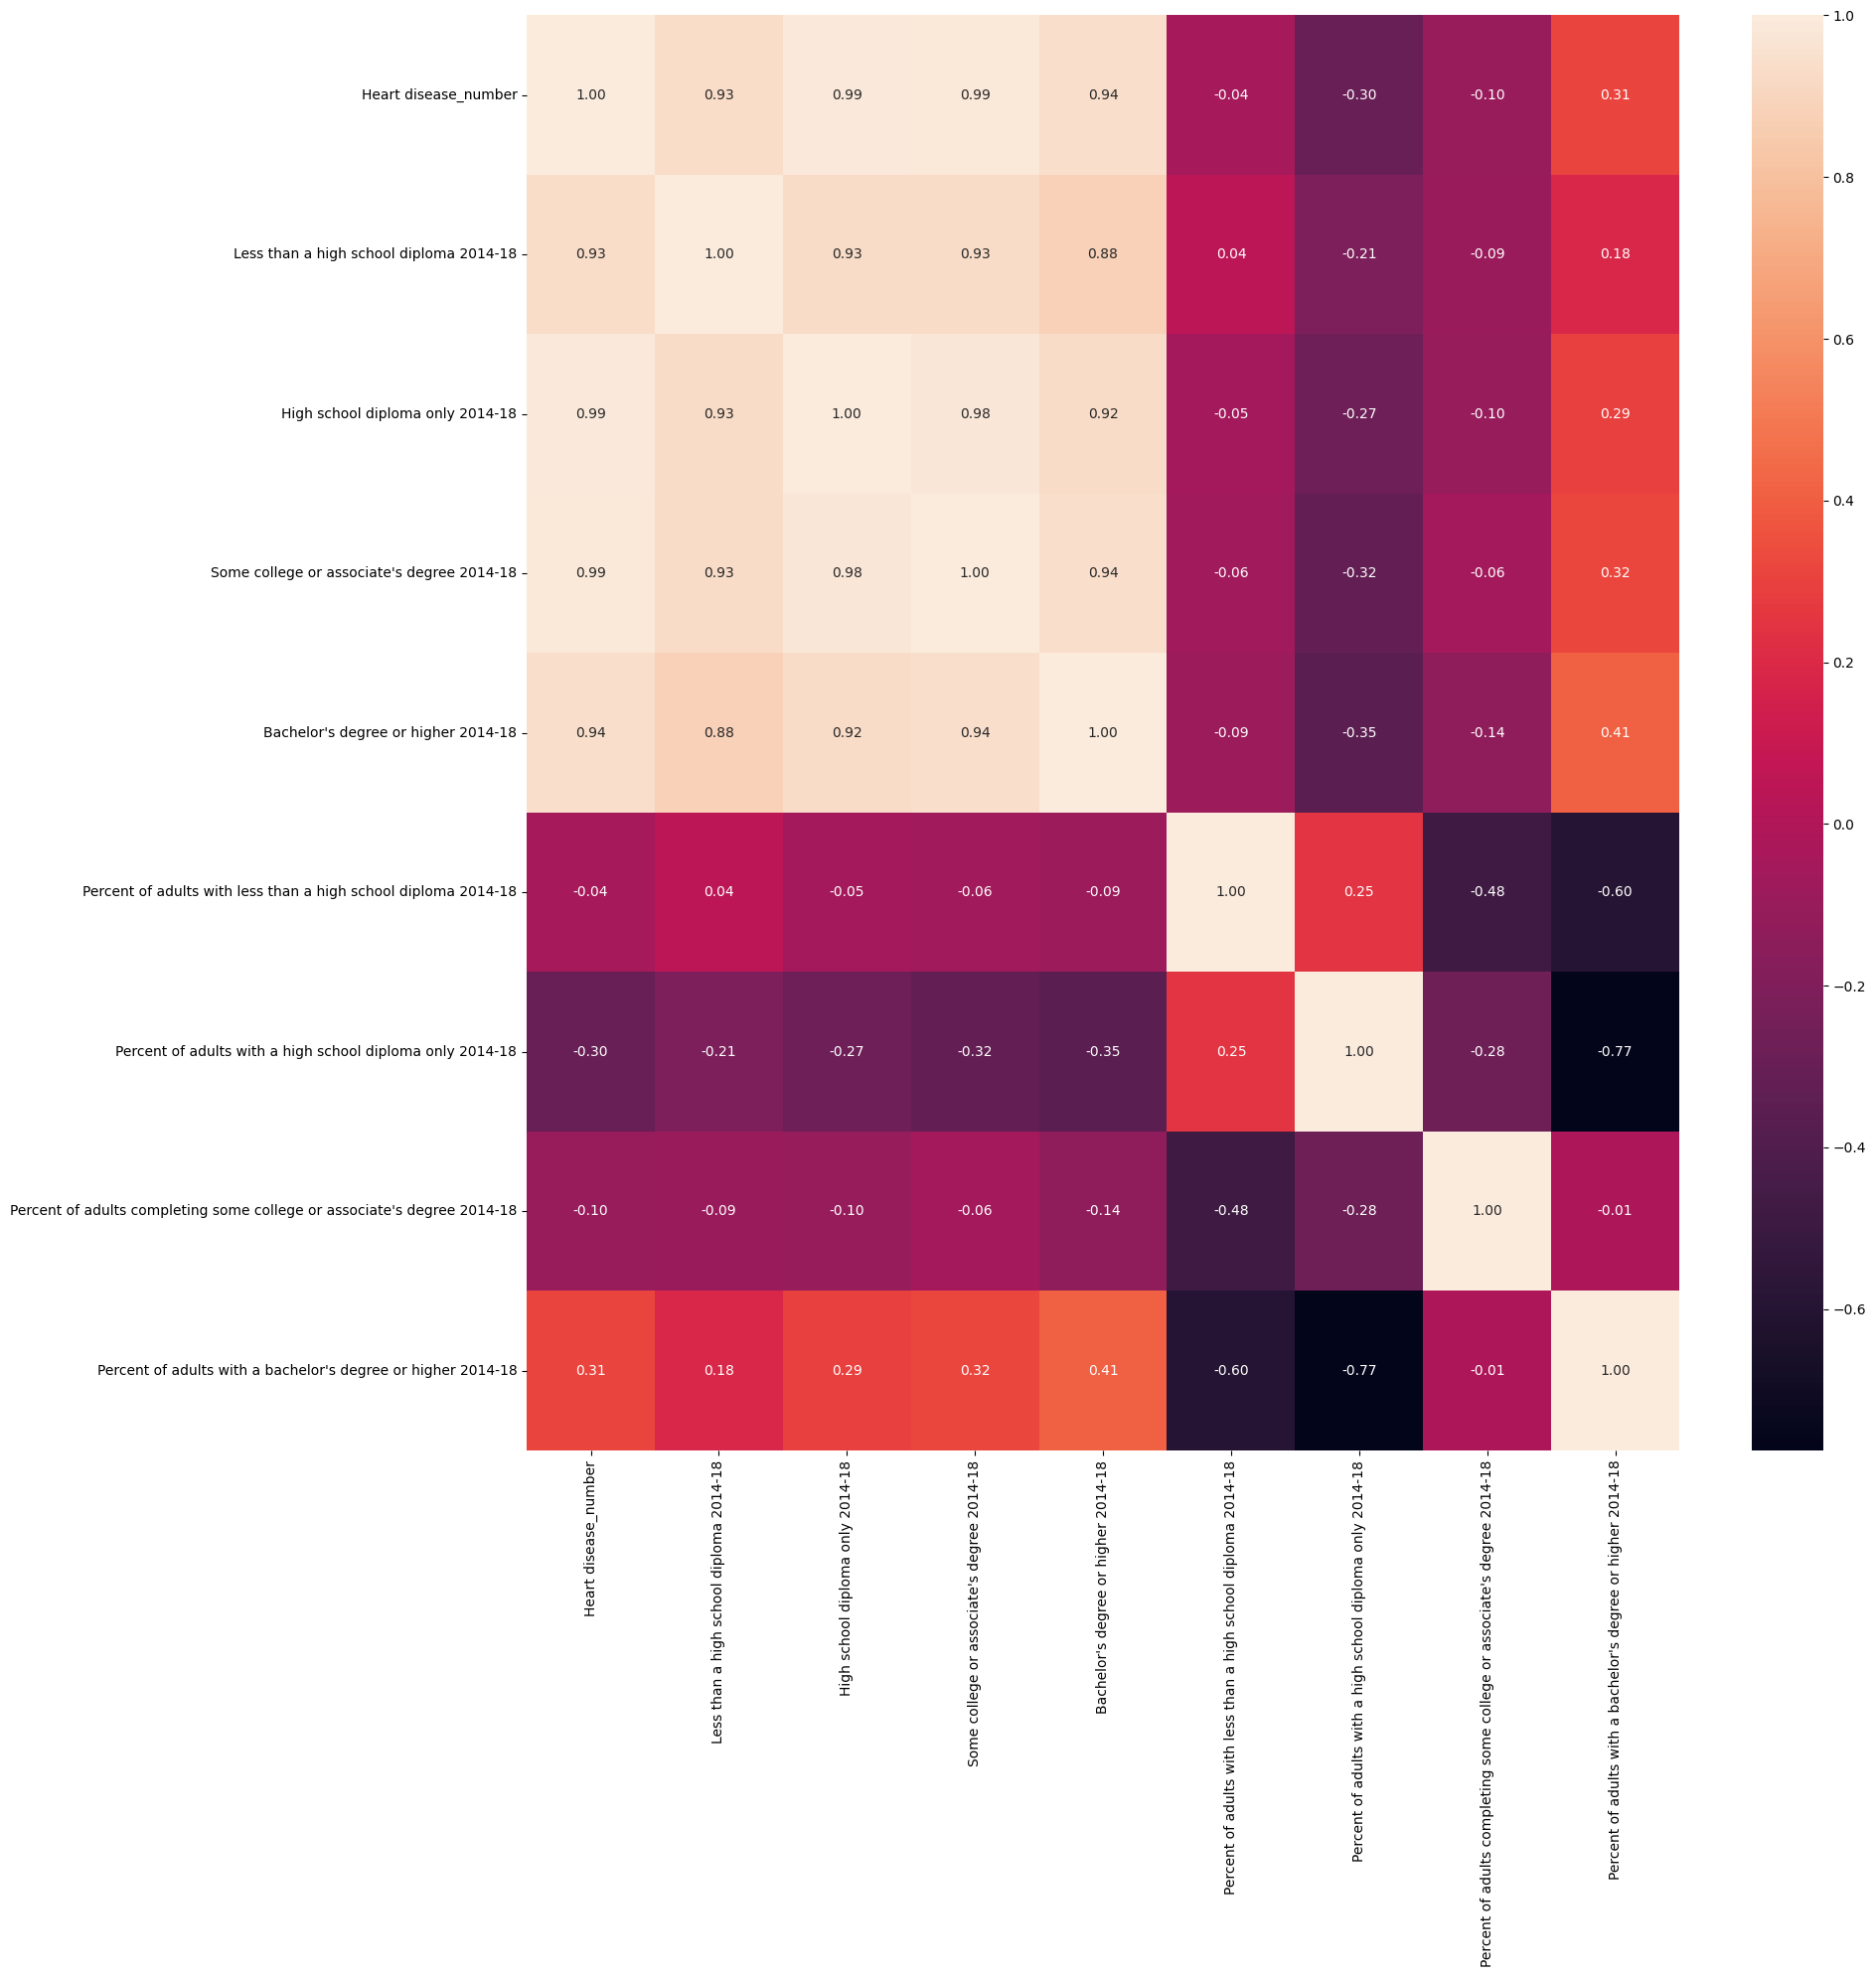

In [71]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b4 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

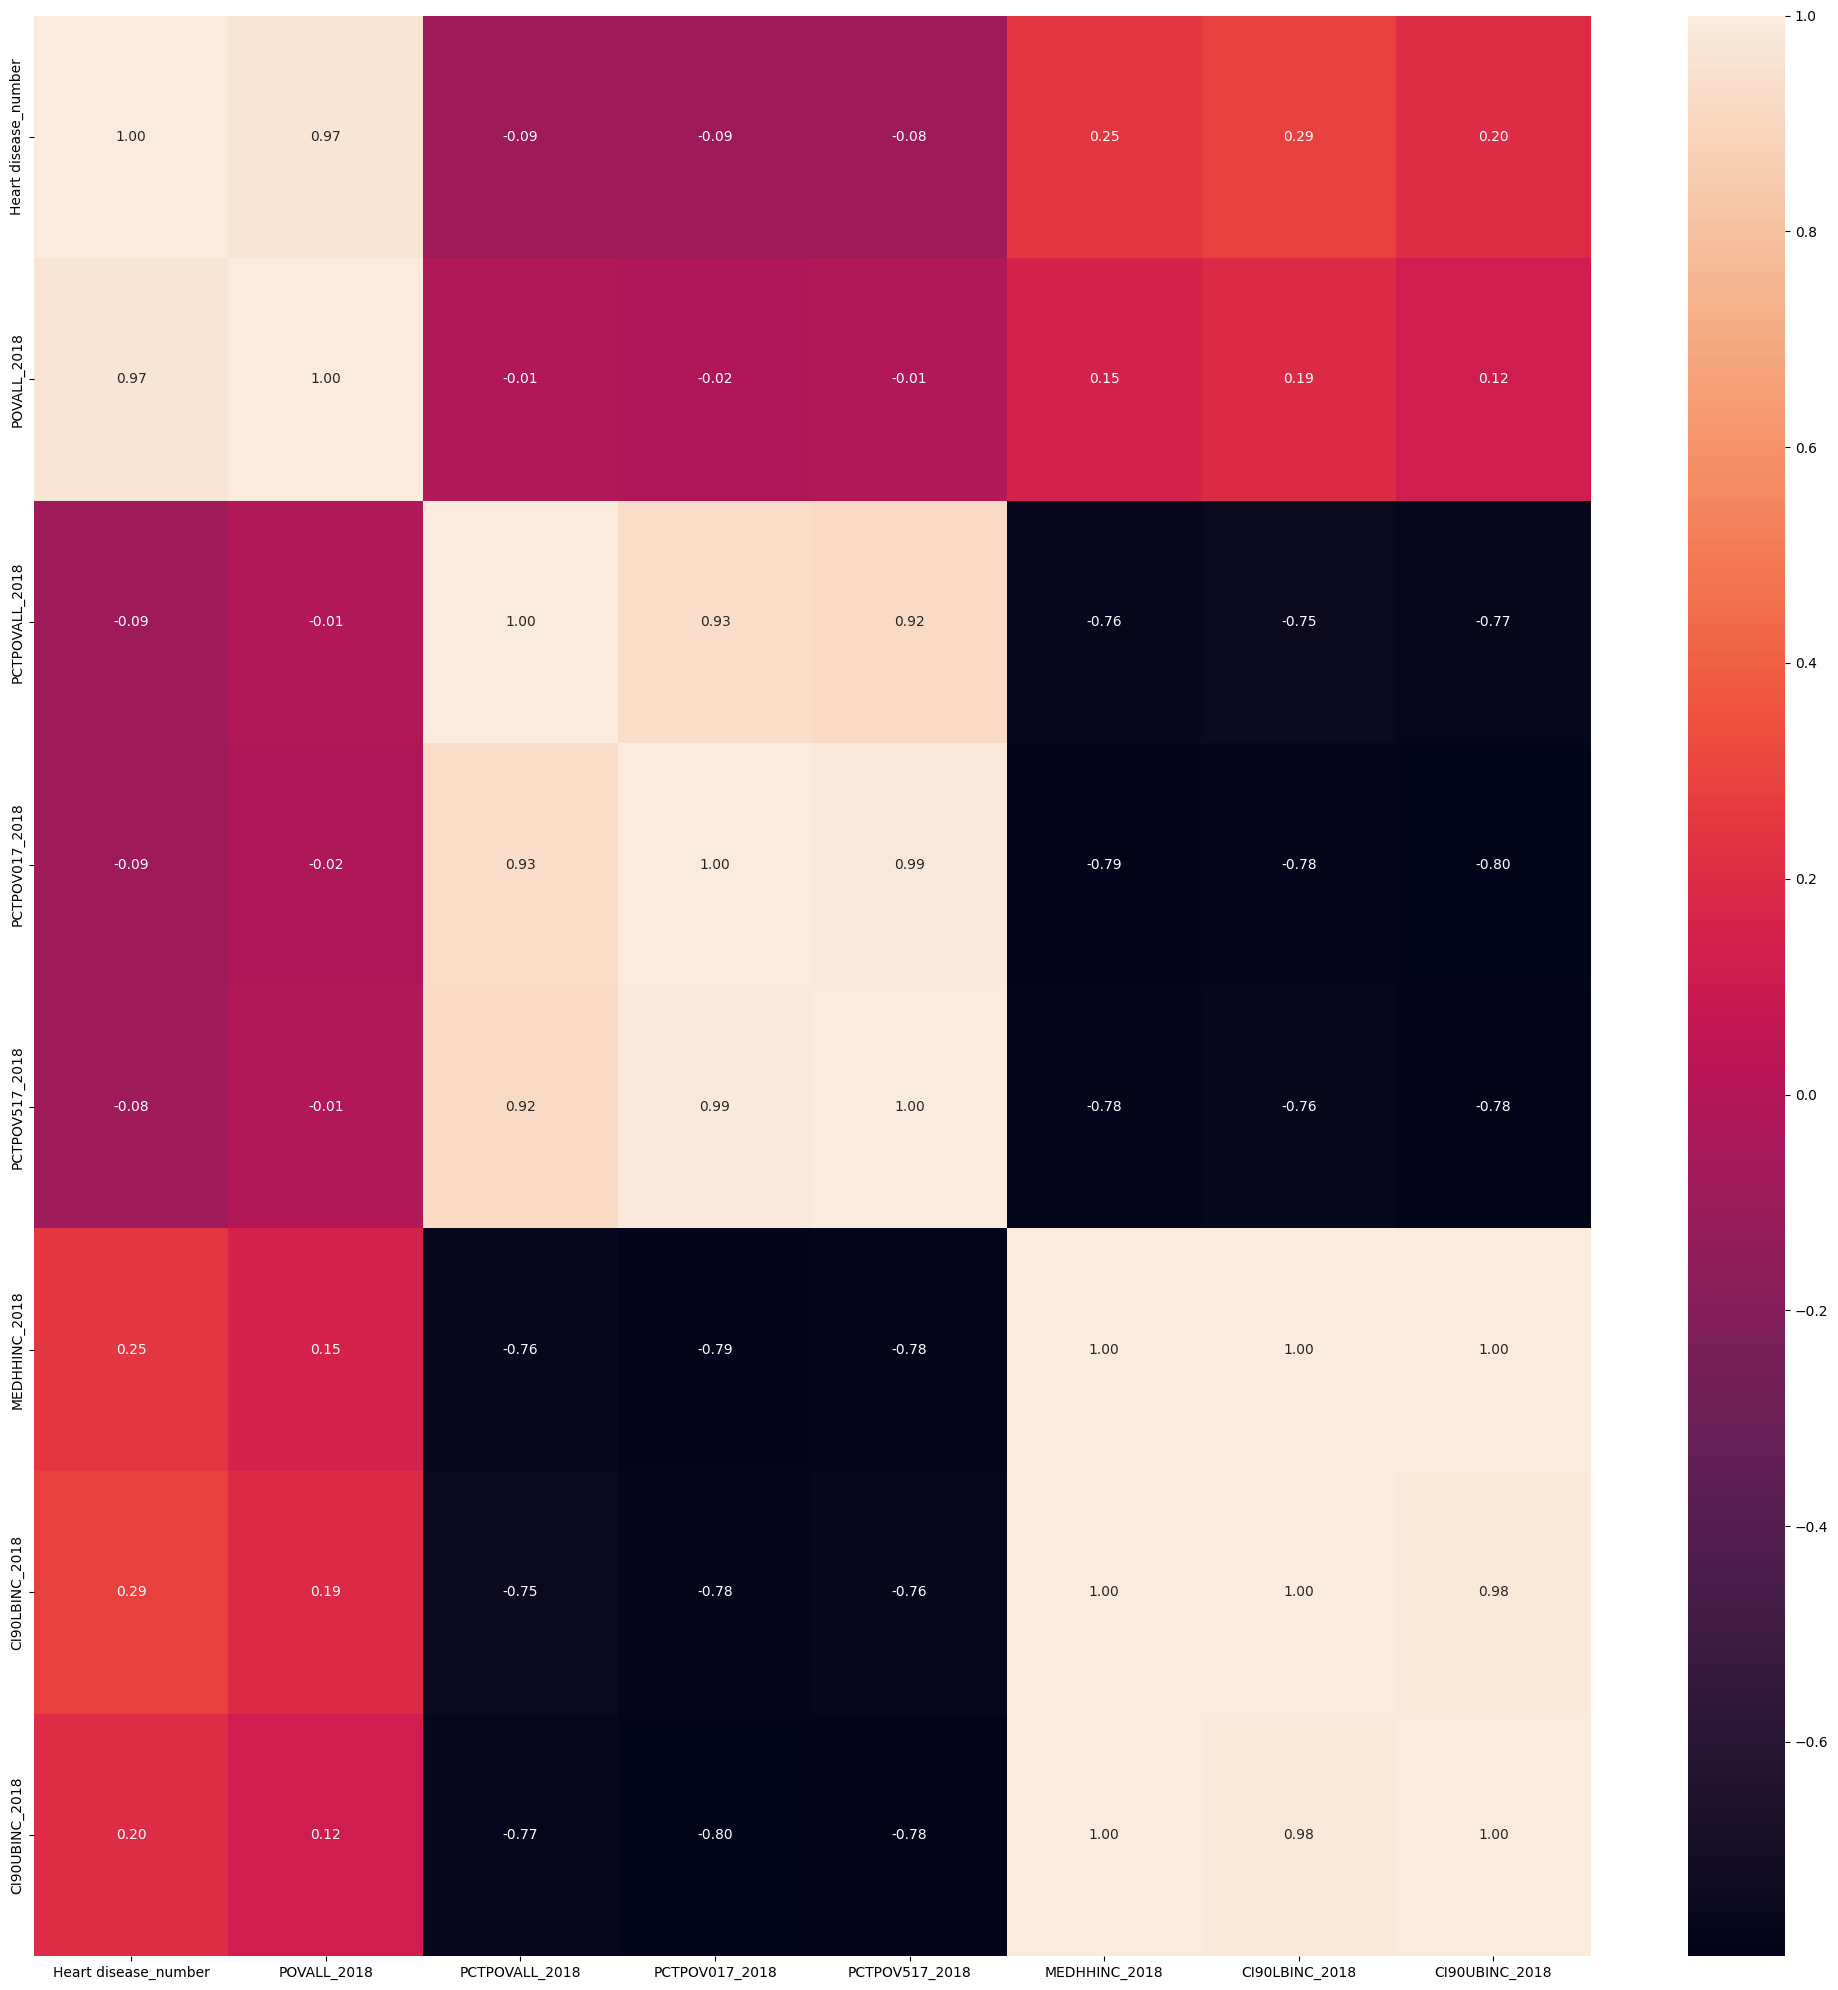

In [72]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b5 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

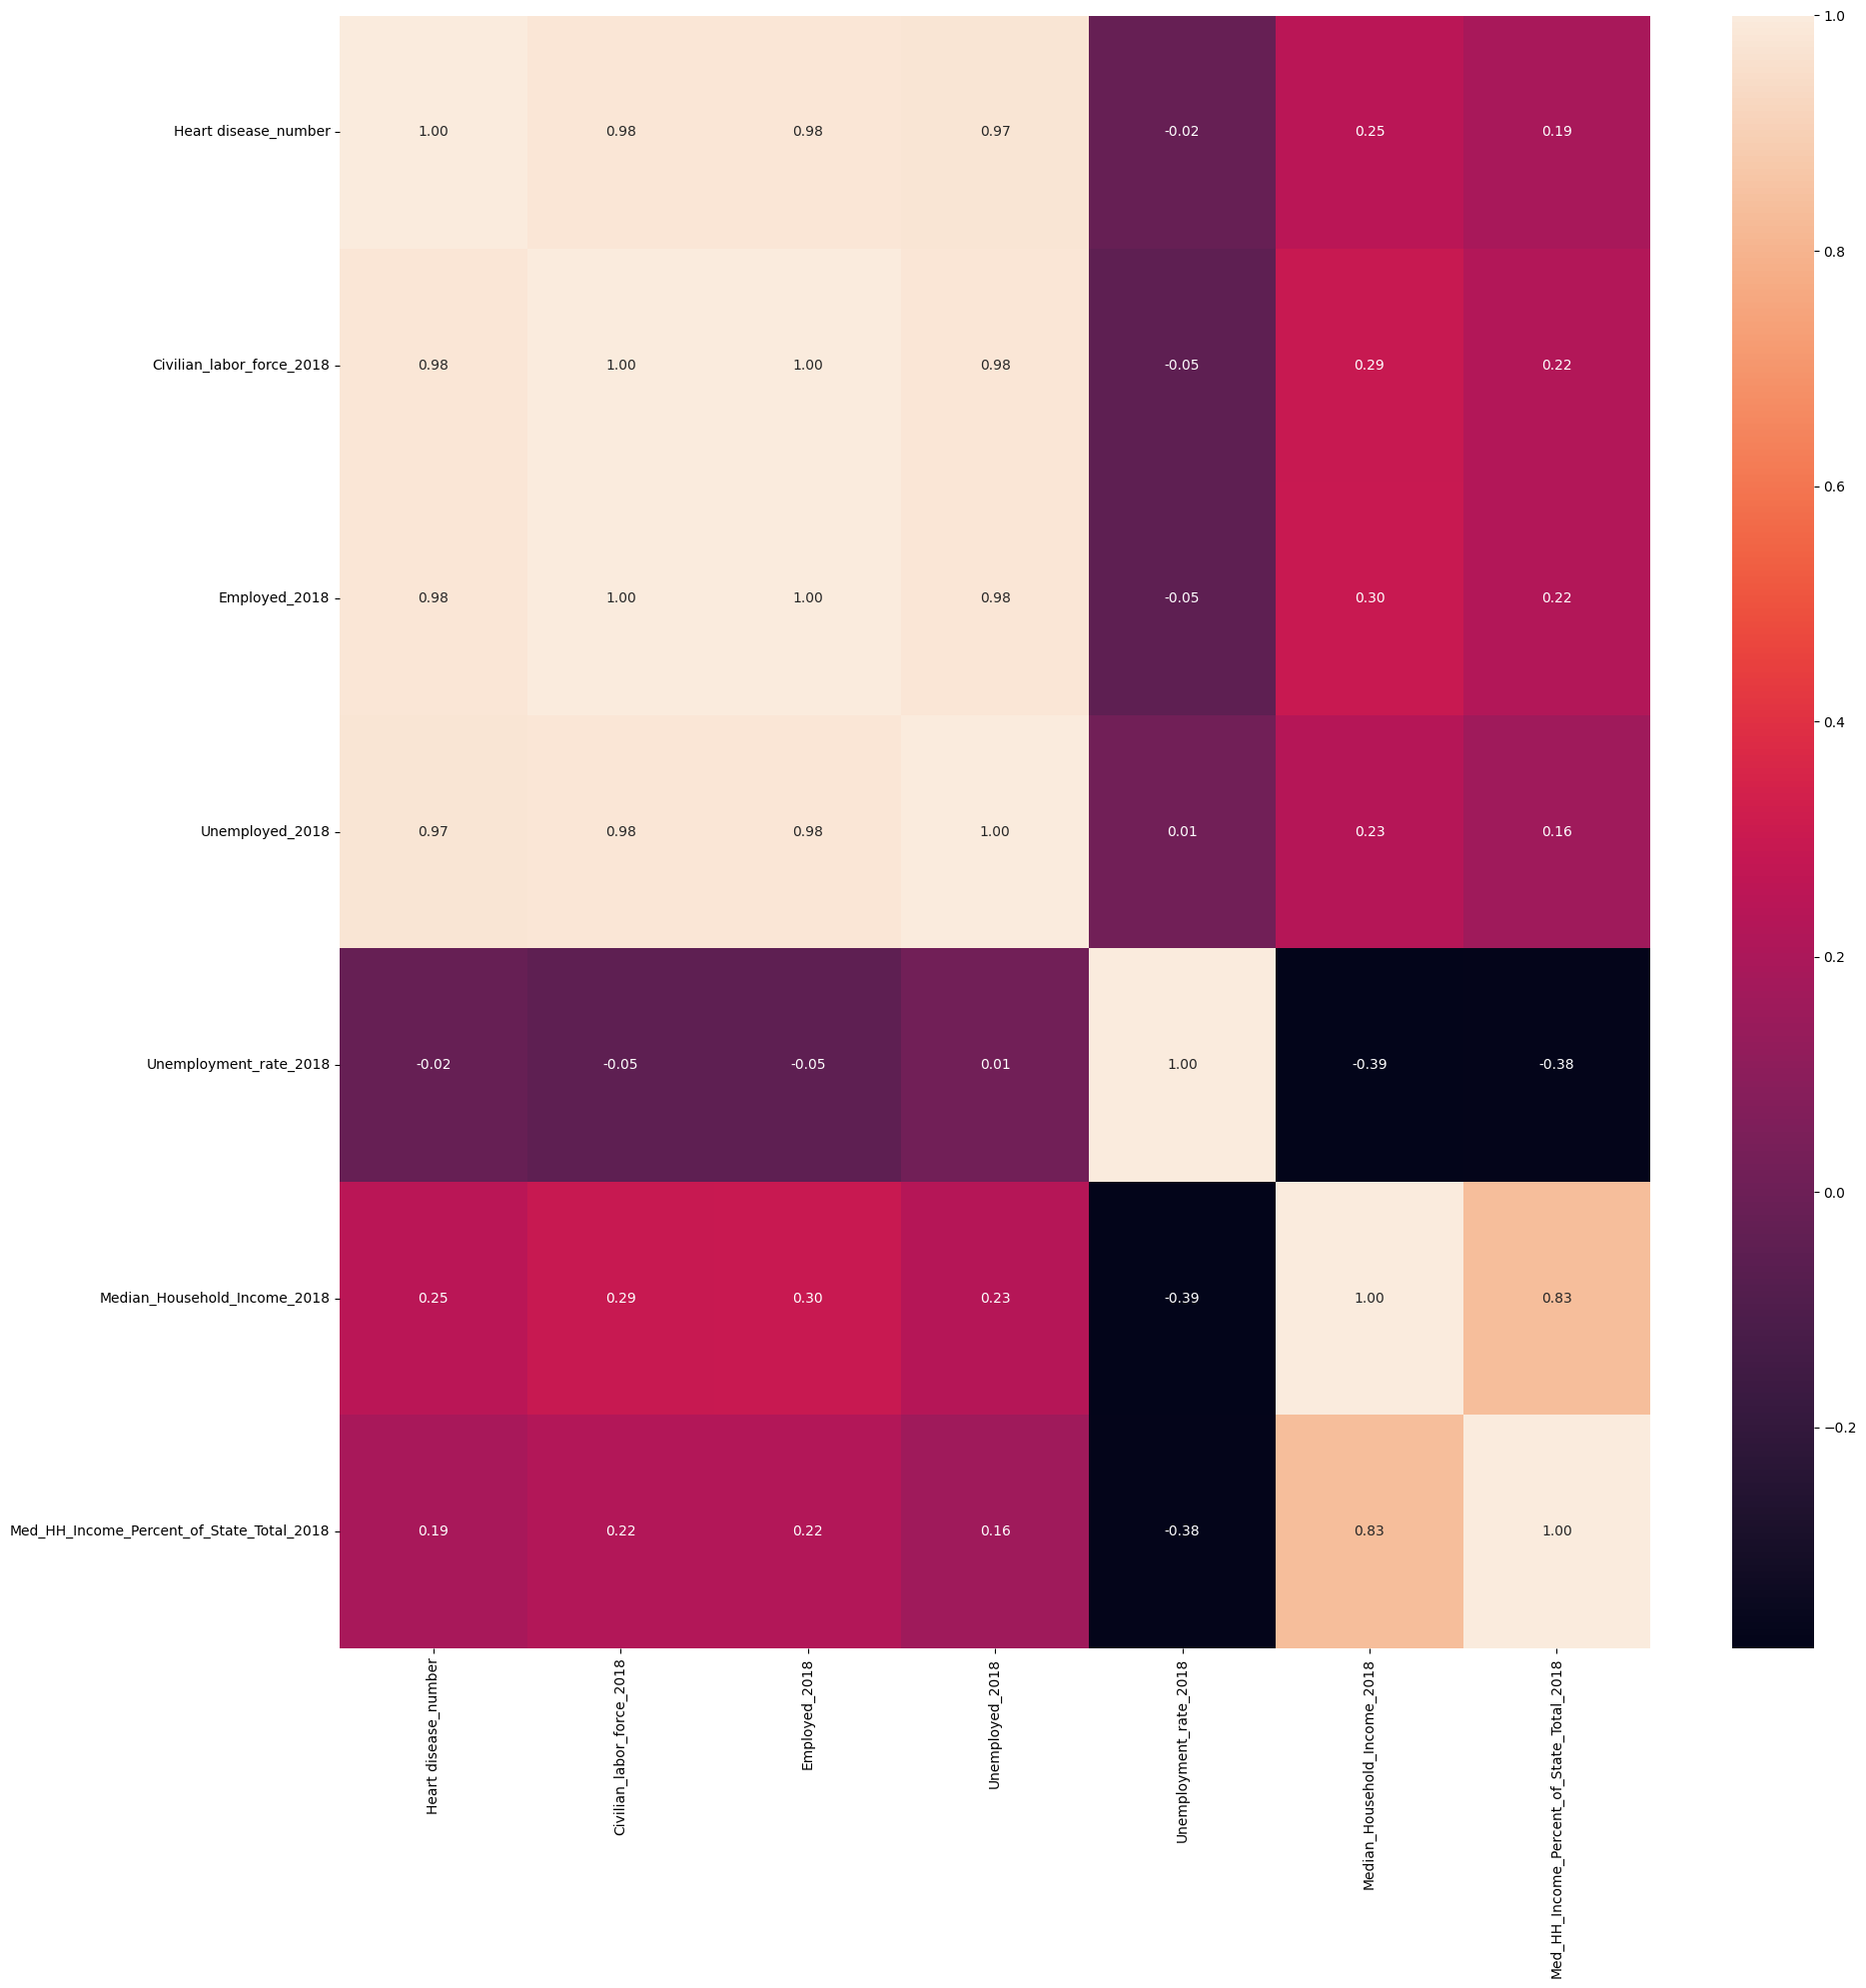

In [73]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b6 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

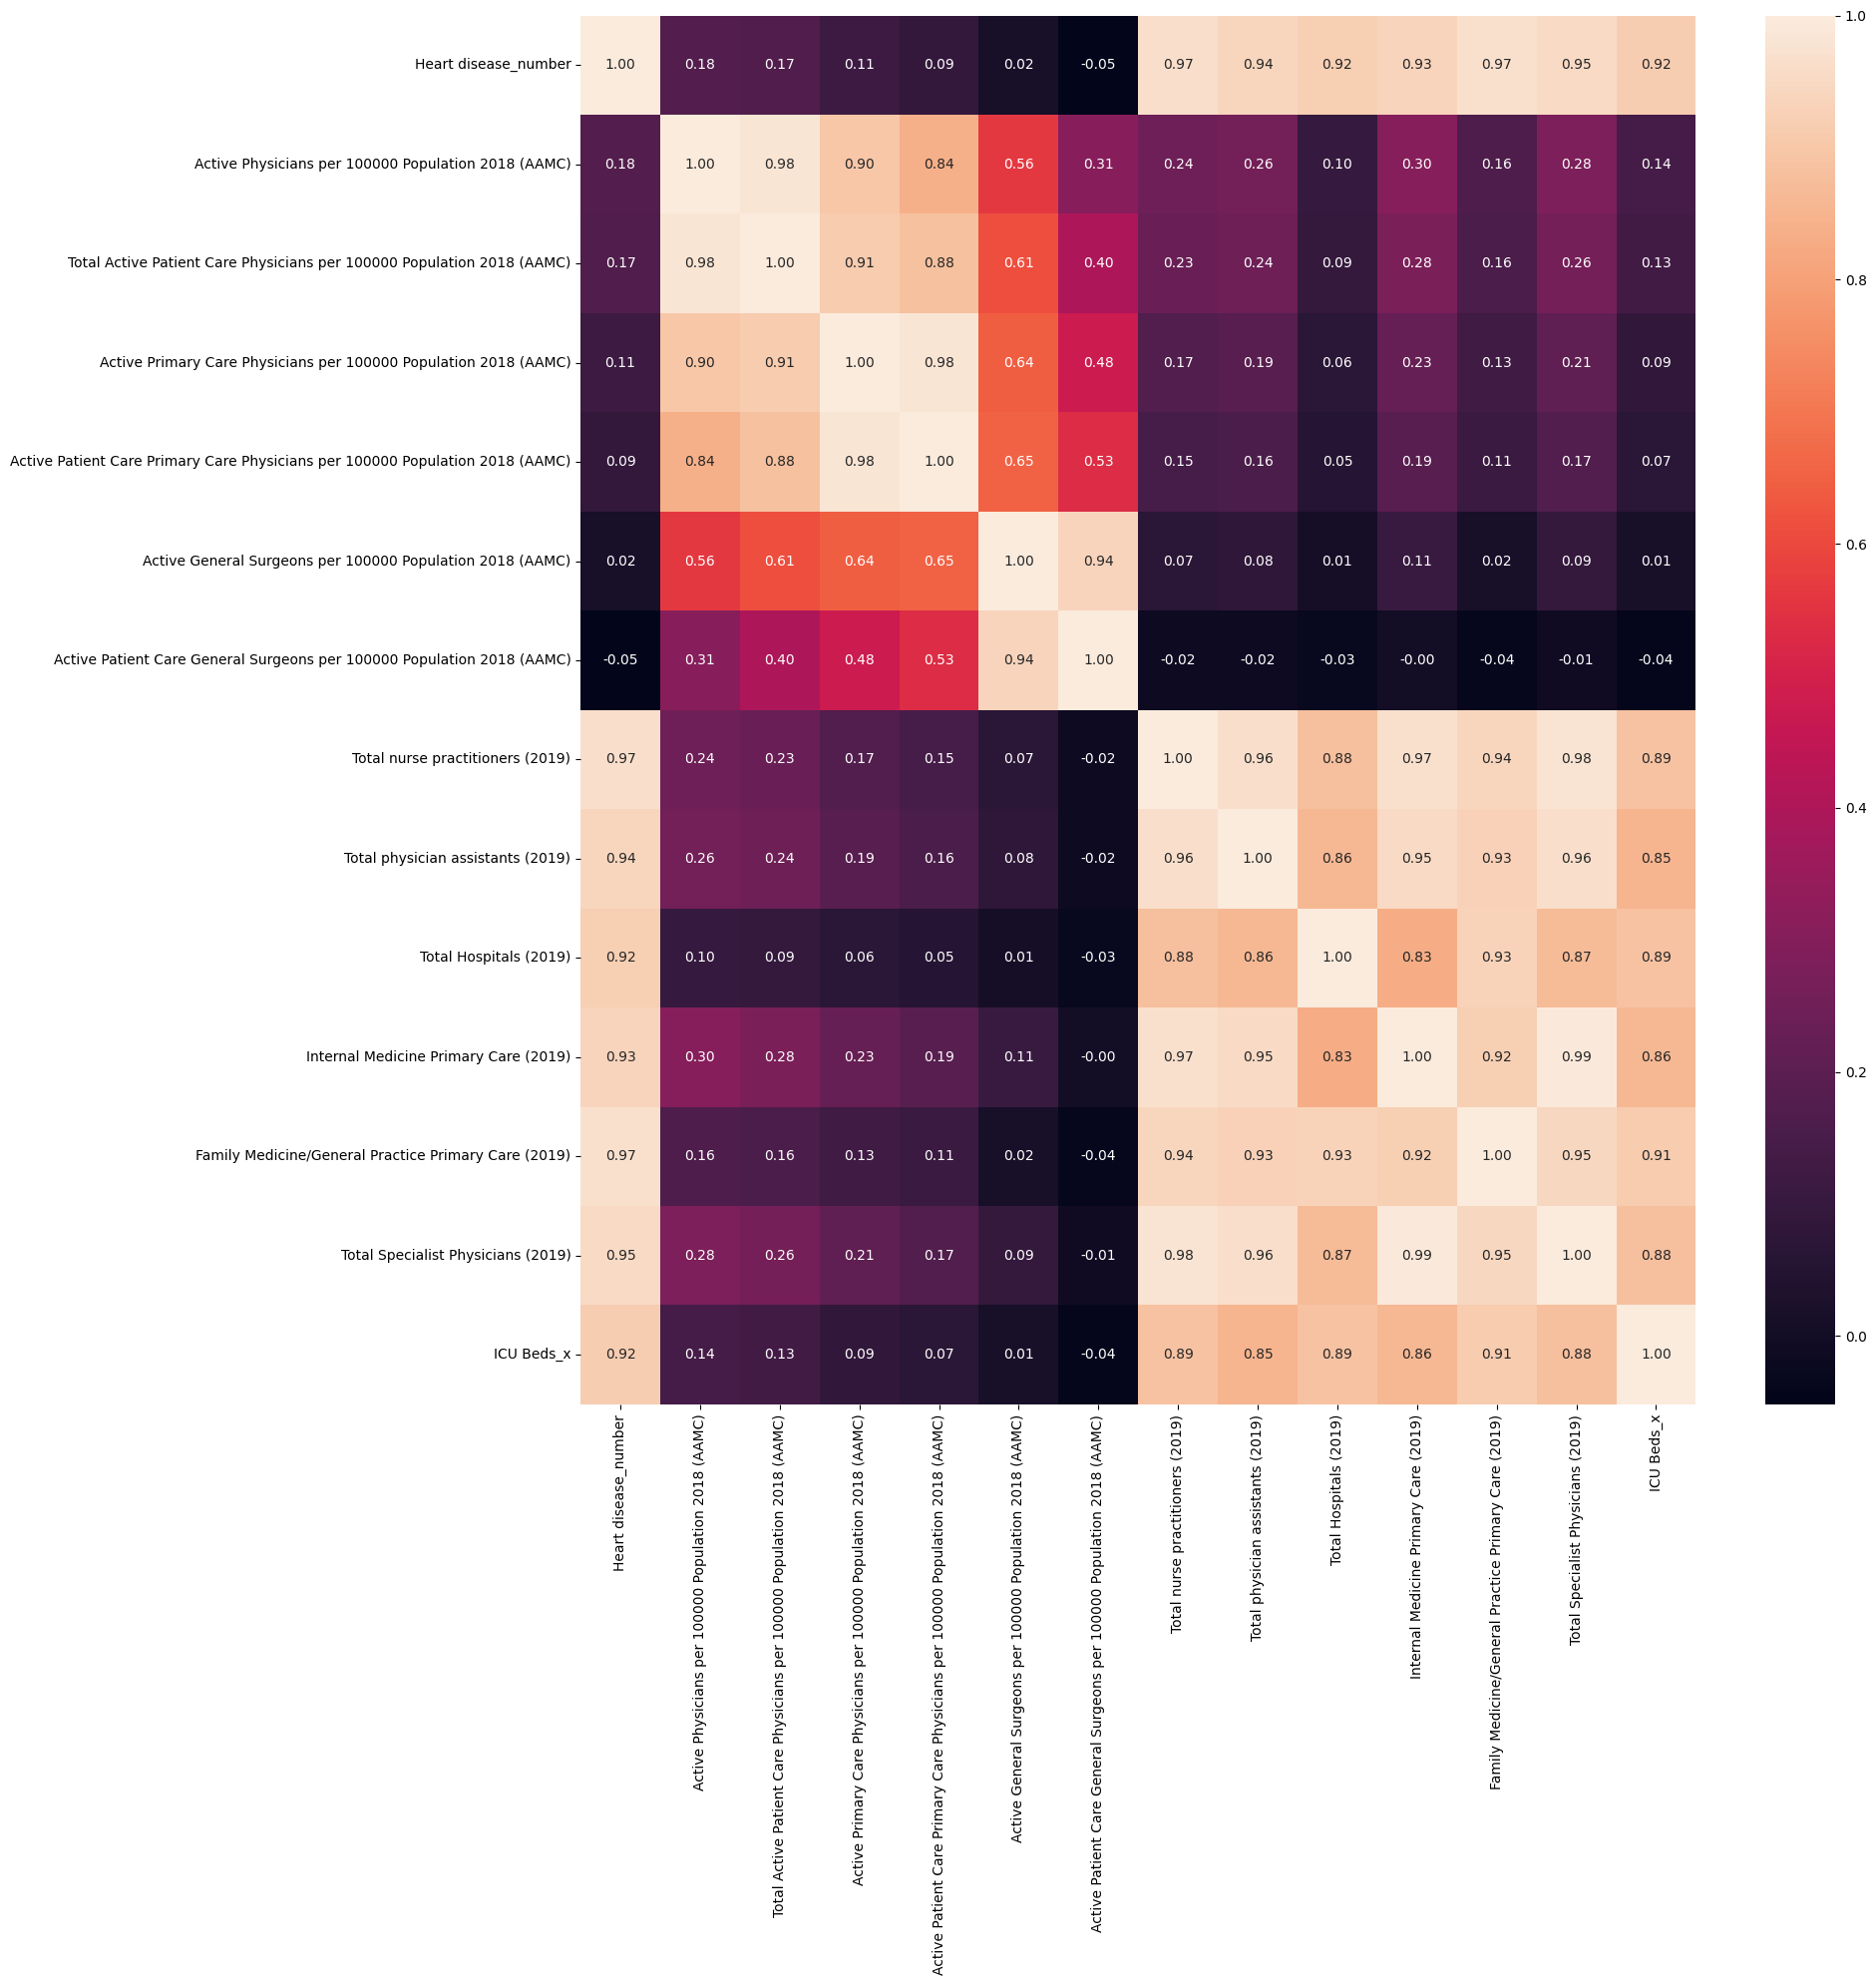

In [74]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b7 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

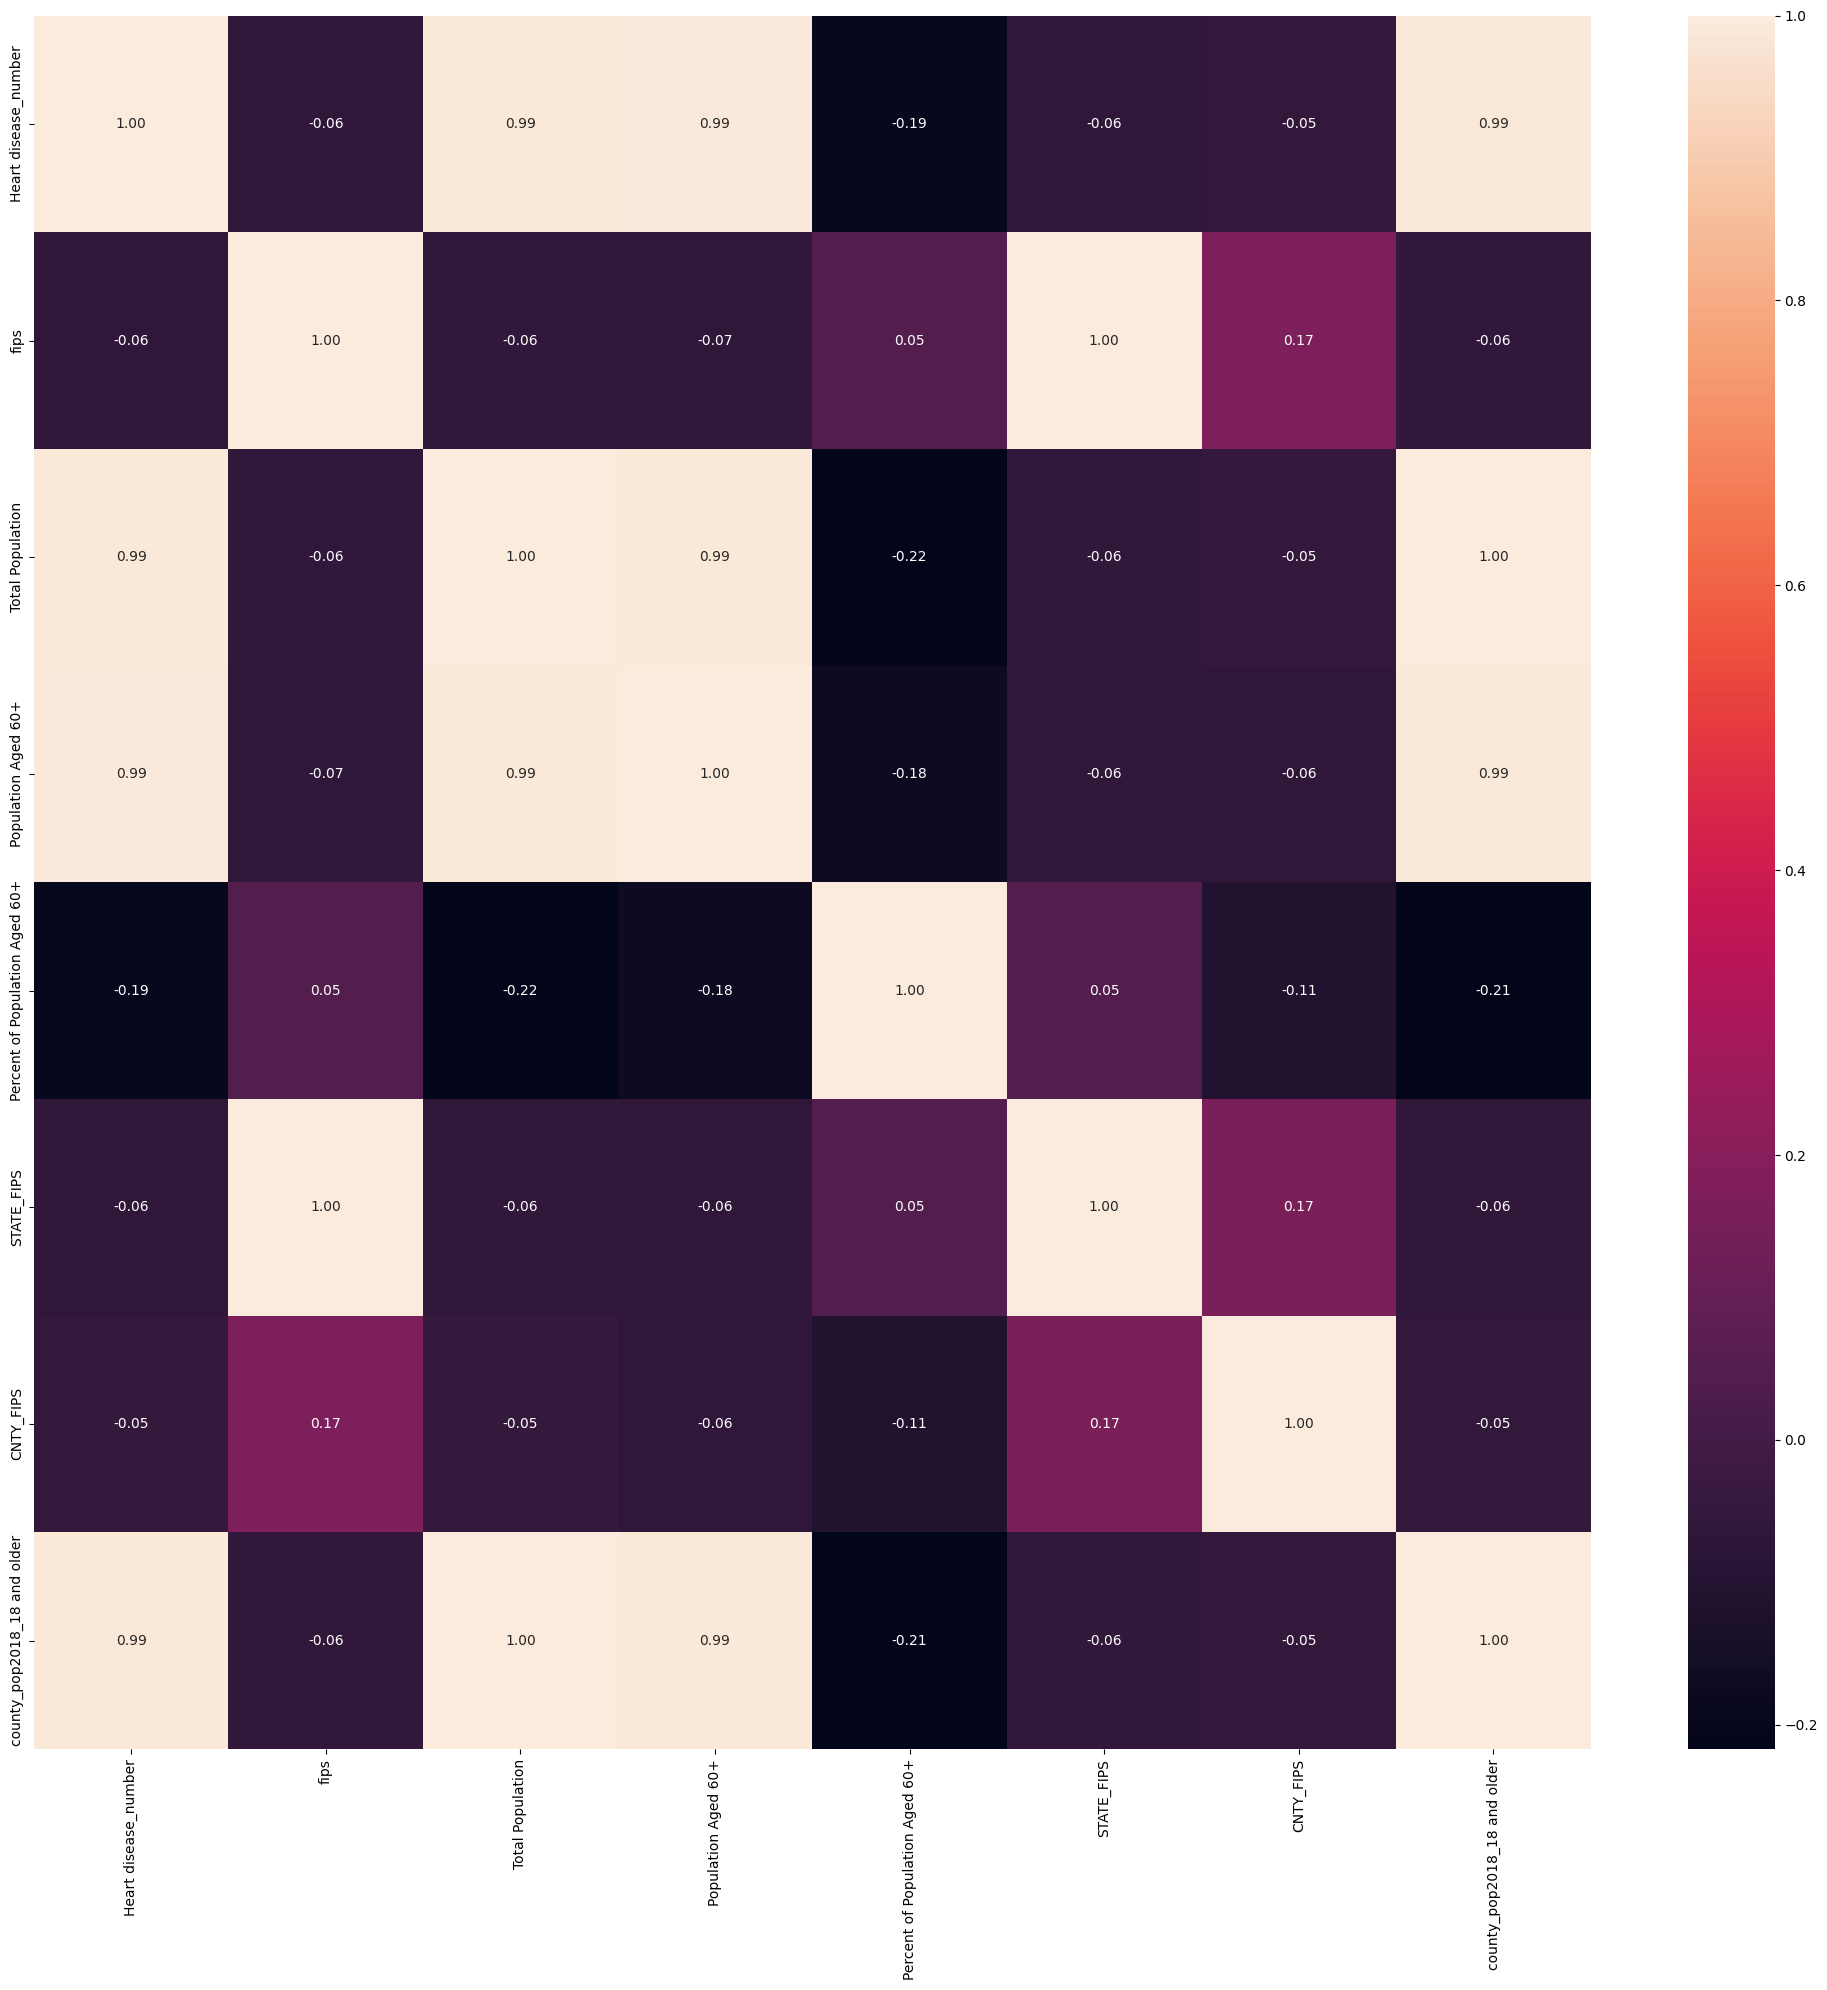

In [75]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b8 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

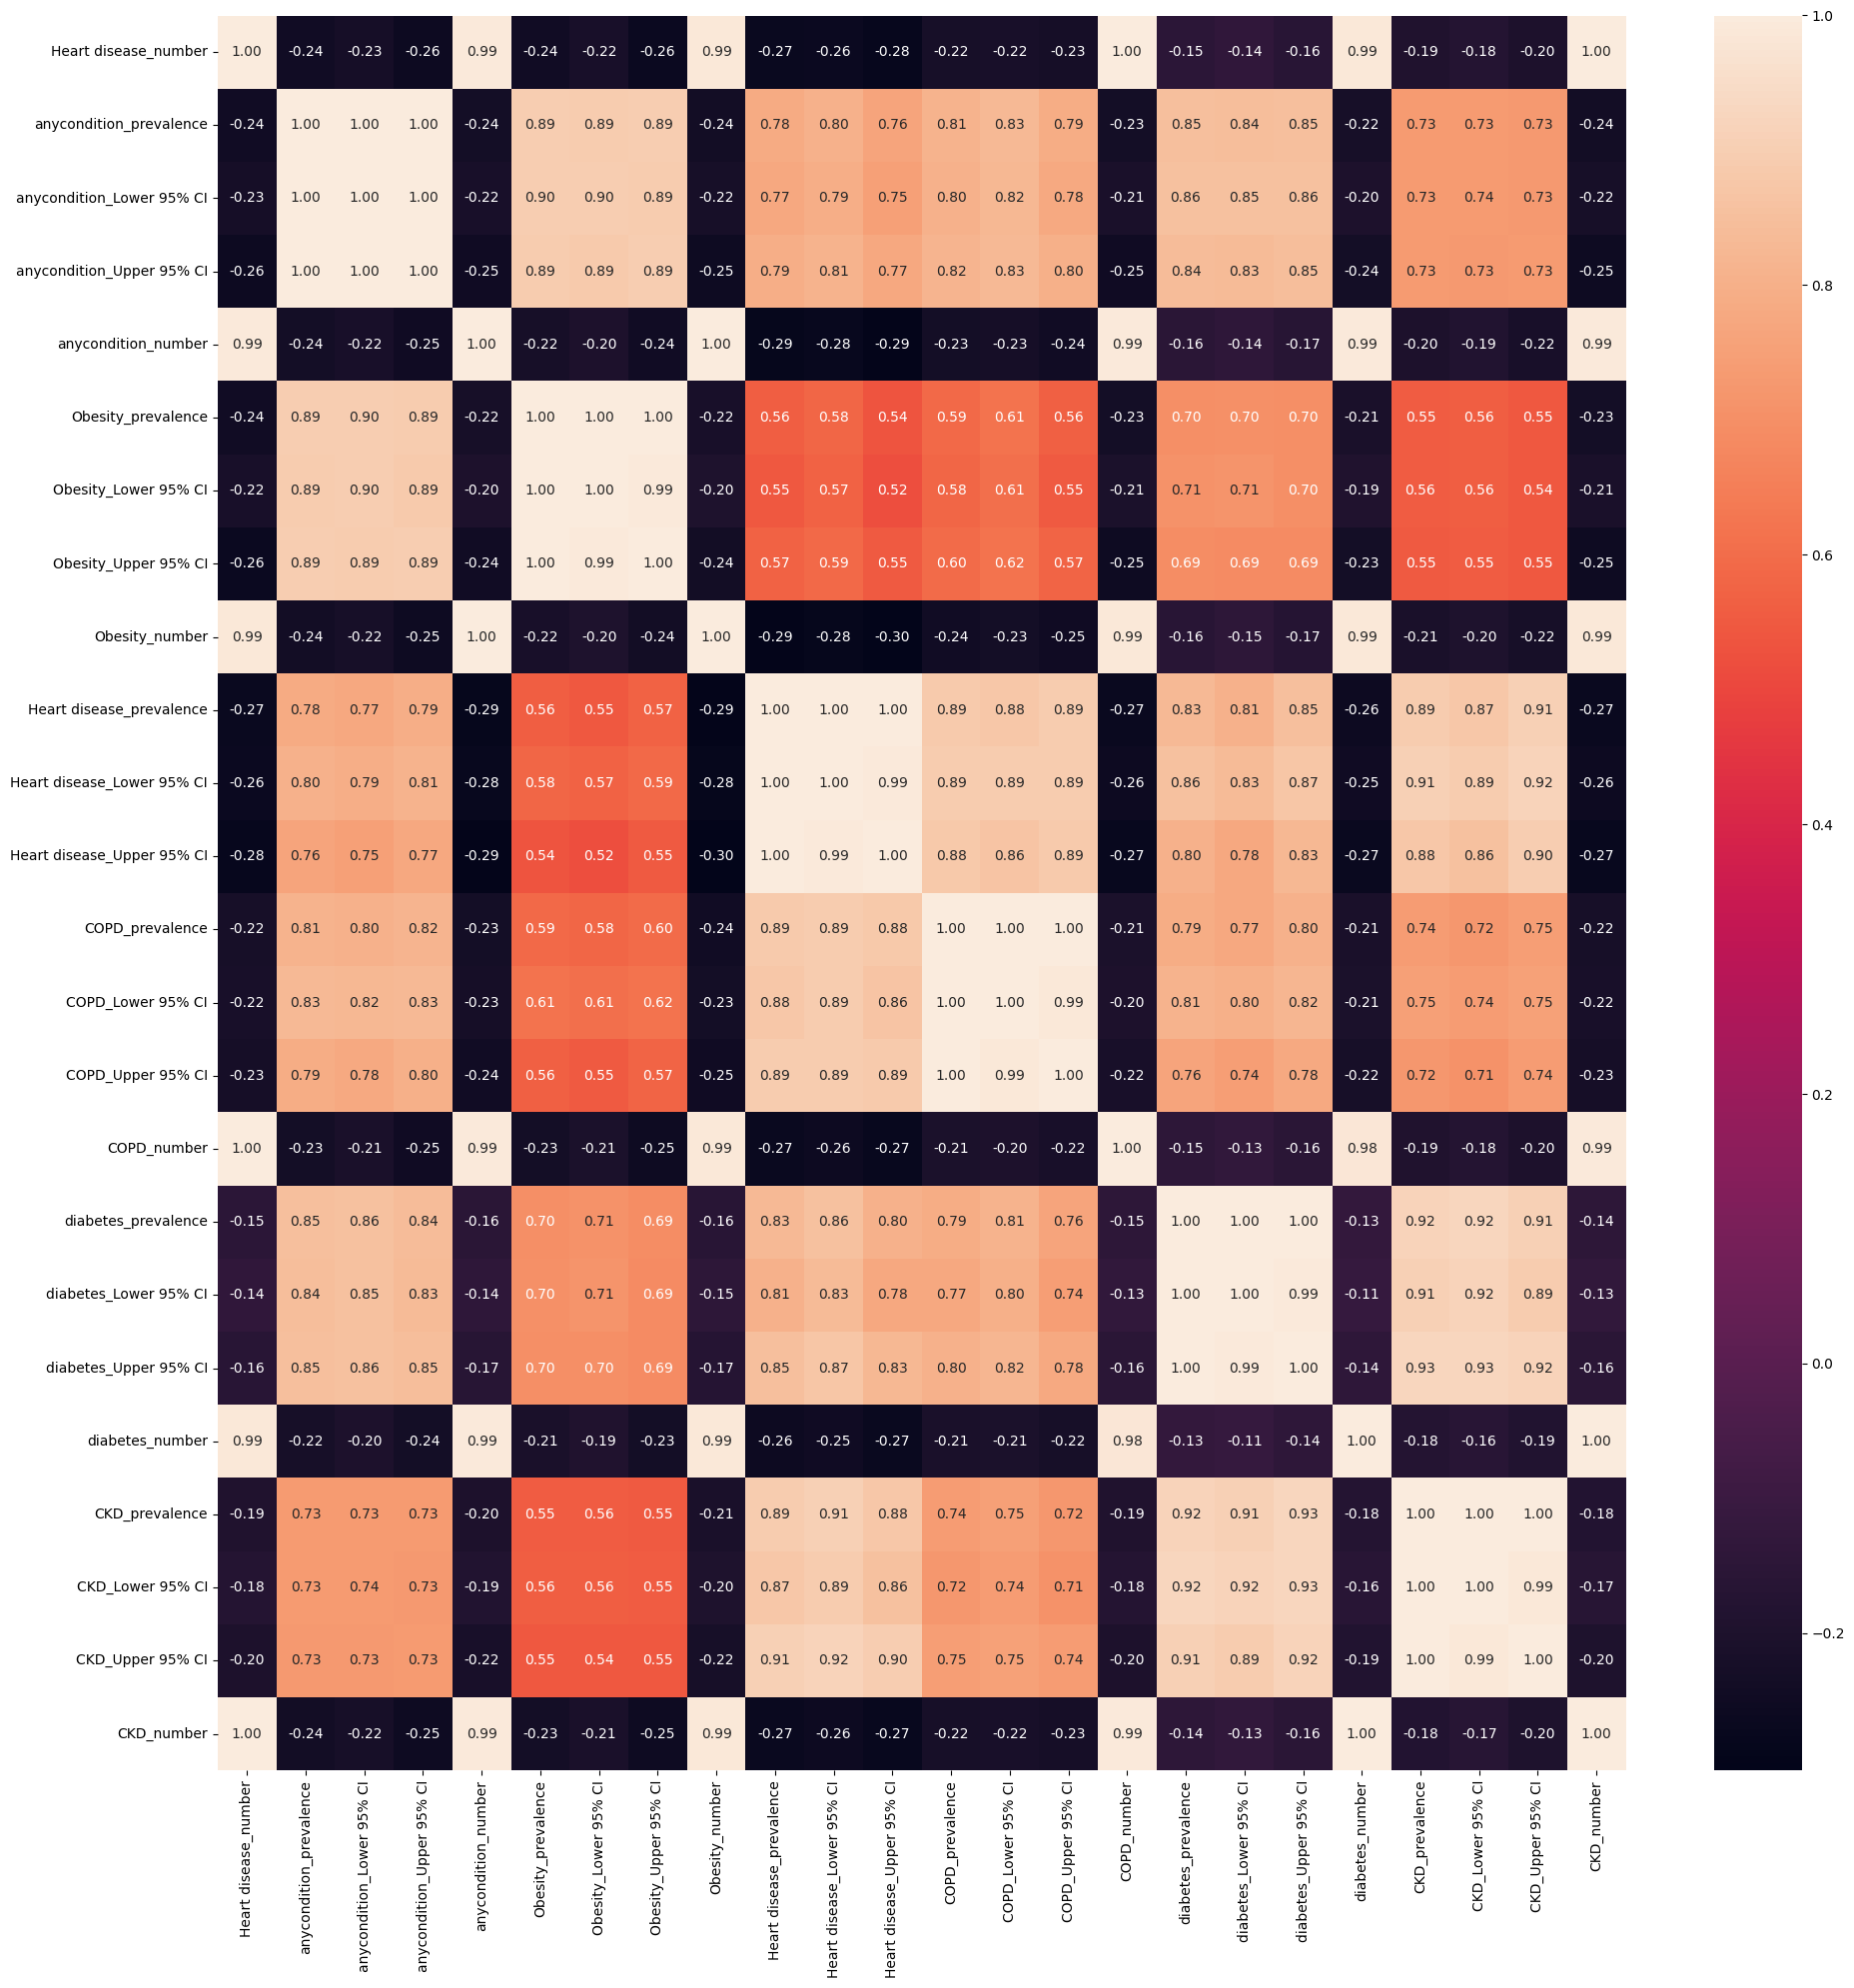

In [76]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(
    df[
        b9 
    ].corr(),
    annot=True,
    fmt = ".2f"
)

plt.tight_layout()
plt.show()

### Feature Engineering

In [80]:
scaler = StandardScaler()
norm_features = scaler.fit_transform(df[n_cols])

In [81]:
# Crear un nuevo DataFrame con las variables numéricas escaladas
df_skld = pd.DataFrame(norm_features, index = df.index, columns = n_cols)
df_skld["Heart disease_number"] = df["Heart disease_number"]
df_skld.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


### Splitting Data

In [83]:
x = df_skld.drop(columns=['Heart disease_number'])
y = df_skld['Heart disease_number']

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42
)

In [84]:
k_val = int(len(x_train.columns) * 0.3)

sel_model = SelectKBest(
    f_regression,
    k = k_val
)

sel_model.fit(x_train, y_train)

g_sup = sel_model.get_support()

In [86]:
x_train_sel = pd.DataFrame(sel_model.transform(x_train), columns = x_train.columns.values[g_sup])
x_test_sel = pd.DataFrame(sel_model.transform(x_test), columns = x_test.columns.values[g_sup])

x_train_sel["Heart disease_number"] = list(y_train)
x_test_sel["Heart disease_number"] = list(y_test)

### Save Data to CSVs

In [87]:
x_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
x_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

### Linear Regression Model - Creation

In [89]:
train_data = pd.read_csv('../data/processed/clean_train.csv')
test_data = pd.read_csv('../data/processed/clean_test.csv')

In [90]:
x_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
x_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [91]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [92]:
print(f"Intercep (a): {model.intercept_}\nCoefficients: {model.coef_}")

Intercep (a): 5596.671871330509
Coefficients: [ 3.15630344e+15 -3.51767308e+14 -3.55781554e+14 -4.17147777e+14
 -4.12210653e+14 -3.65775704e+14 -3.59452061e+14 -2.90439901e+14
 -1.70699337e+14 -1.01504857e+14  1.84034719e+03 -3.49527399e+14
  1.61639037e+03  1.41935999e+02  1.91540615e+03  1.64926769e+03
  4.19495639e+02  4.95812500e+02 -1.26078125e+03 -5.41796875e+02
  2.59531250e+02 -7.28375000e+02 -5.58625000e+02 -1.82242188e+04
  8.38850000e+03  4.35541562e+04 -7.21906250e+02  2.24965625e+03
  5.20421875e+03  2.27725000e+03  3.01765625e+03]


In [93]:
y_predict = model.predict(x_test)
y_predict

array([7.09047809e+02, 1.31577333e+04, 1.69127687e+03, 6.90525736e+03,
       1.12432021e+04, 1.40174761e+03, 7.59313168e+02, 1.32053178e+03,
       3.95057910e+02, 6.89781527e+02, 1.29621918e+03, 2.30963198e+02,
       4.33791391e+03, 1.41635934e+03, 9.21264527e+03, 2.47831647e+03,
       5.40710099e+04, 1.22952871e+03, 1.93285598e+03, 4.42074865e+02,
       1.52397213e+03, 6.93720894e+02, 8.51134064e+02, 5.94222631e+02,
       9.79759690e+04, 2.43289502e+03, 8.87292308e+02, 2.13308924e+03,
       8.65429660e+02, 1.89143218e+02, 1.16753924e+03, 1.82616159e+03,
       2.63061907e+03, 3.20854802e+03, 8.75189804e+03, 1.54125486e+03,
       2.62753650e+03, 1.24299036e+03, 8.66991951e+02, 1.79072700e+03,
       1.37057200e+03, 9.06051120e+03, 3.84218006e+02, 1.52500791e+02,
       2.61447108e+03, 7.21317742e+02, 3.46767829e+02, 7.71856472e+03,
       1.08384941e+03, 7.63566145e+02, 1.82806982e+04, 3.24139611e+02,
       1.44021873e+03, 5.55774538e+02, 8.49558783e+03, 7.58473307e+02,
      

In [112]:
metrics = {
    'original_model': {
        'MSE': 0,
        'MSE(SQRT)': 0,
        'r2_score': 0
    },
    'optimized_model': {
        'MSE': 0,
        'MSE(SQRT)': 0,
        'r2_score': 0,
    }
}

metrics['original_model']['MSE'] = mean_squared_error(y_test, y_predict)
metrics['original_model']['MSE(SQRT)'] = np.sqrt(mean_squared_error(y_test, y_predict))
metrics['original_model']['r2_score'] = r2_score(y_test, y_predict)

metrics['original_model']

{'MSE': 193503.48747085236,
 'MSE(SQRT)': 439.8903129995617,
 'r2_score': 0.9977891752877528}

### Linear Regression Model - Optimization using Lasso

In [104]:
hyperparams = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid_search = GridSearchCV(
    Lasso(),
    param_grid = hyperparams,
    cv = 10,
    scoring = 'neg_mean_squared_error'
)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [105]:
grid_search.best_params_

{'alpha': 100}

In [106]:
model_opt = Lasso(
    alpha = 100
)

model_opt.fit(x_train, y_train)

Lasso(alpha=100)

In [108]:
opt_y_pred = model_opt.predict(x_test)

In [109]:
print(f"Intercep (a): {model_opt.intercept_}\nCoefficients: {model_opt.coef_}")

Intercep (a): 5601.100748148686
Coefficients: [   0.            0.            0.            0.            0.
    0.            0.            0.         3744.24660661  162.68346109
    0.            0.            0.            0.            0.
   89.05151594    0.            0.            0.           16.26608203
  132.97171387    0.            0.            0.            0.
    0.            0.         1626.28372576 7273.1459247  2263.6707126
  300.867472  ]


In [125]:
metrics['optimized_model']['MSE'] = mean_squared_error(y_test, opt_y_pred)
metrics['optimized_model']['MSE(SQRT)'] = np.sqrt(mean_squared_error(y_test, opt_y_pred))
metrics['optimized_model']['r2_score'] = r2_score(y_test, opt_y_pred)

metrics['optimized_model']

{'MSE': 280265.4137373237,
 'MSE(SQRT)': 529.4009952175418,
 'r2_score': 0.9967978990416283}

In [137]:
# Metrics Comparison
for i in metrics:
    print(i.replace('_', ' ').title())
    print('\t', metrics[i]['MSE'])
    print('\t', metrics[i]['MSE(SQRT)'])
    print('\t', metrics[i]['r2_score'])
    print('\n')

Original Model
	 193503.48747085236
	 439.8903129995617
	 0.9977891752877528


Optimized Model
	 280265.4137373237
	 529.4009952175418
	 0.9967978990416283




In [139]:
dump(model, open('../models/linear_regression.sav', 'wb'))
dump(model_opt, open('../models/lasso_alpha-100.sav', 'wb'))